First I am having the data and let me Load the dataset here using Pandas Library

PipeLine of Machine Learning Project:

Collect the data

check the data information

split the data

training operations should be done on test data [Just Keep in Mind]

Handle Missing values if There

EDA Part [Exploratory Data Analysis]

Checking Normal Distribution
Checking Outliers
Handling them
Handle Cateogorical data

Transformation Techniques

select best features for both numerical and categorical data

Model developement

check validation

Evaluate model

check AUC and ROC For selecting Best Model

Hyperparameter tuning on the top of the best model

Save the model

Read the Model and check once again

Using Flask Integrate with HTML and CSS

Generate outcome in localhost

Deploy in Server

API Generation

Share our Project API

In [1]:
import numpy as np 
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading dataset:

data = pd.read_csv('./creditcard.csv')

data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,Good


In [4]:
### checking whether the data is clear or not:

data.isnull().sum()

NPA Status                                  2
RevolvingUtilizationOfUnsecuredLines        2
age                                         2
Gender                                      2
Region                                      2
MonthlyIncome                           29733
Rented_OwnHouse                             2
Occupation                                  2
Education                                   2
NumberOfTime30-59DaysPastDueNotWorse        2
DebtRatio                                   2
MonthlyIncome.1                         29733
NumberOfOpenCreditLinesAndLoans             2
NumberOfTimes90DaysLate                     2
NumberRealEstateLoansOrLines                2
NumberOfTime60-89DaysPastDueNotWorse        2
NumberOfDependents                       3924
Good_Bad                                    2
dtype: int64

In [5]:
data.tail(2)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good,NaN
150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad,NaN


Since the last two rows are completely Null values so I am going to Remove That Last 2 columns

In [6]:
data[data['NPA Status'].isnull()].index

Int64Index([150000, 150001], dtype='int64')

In [7]:
data = data.drop([150000, 150001] , axis = 0)

In [8]:
data.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           29731
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome.1                         29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
Good_Bad                                    0
dtype: int64

In [9]:
# Since the Monthly income and Monthly income:1 has same amount off null values I am going to check 
# Whether there is any duplicate data between them:
# if the std is same means the columns data is same:


In [10]:
data['MonthlyIncome'].std()

14384.67421528196

In [11]:
data['MonthlyIncome.1'].std()

14384.67421528196

In [12]:
# since both are same data columns I can remove any of it:
data = data.drop(['MonthlyIncome.1'] , axis = 1)

In [13]:
data.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           29731
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
Good_Bad                                    0
dtype: int64

To Overcome the dataleakage Problem I am spliting the data into train and test parts and  goint to do the operations on the training part and giving it to test data so this will overcome  My data leakage problem 

In [14]:
import sklearn 
from sklearn.model_selection import train_test_split

In [15]:
X = data.iloc[: , :-1]  # independent 
y = data.iloc[: , -1]    # dependent

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
#out of 1 lakh 15k rows 
len(X_train) , len(y_train)

(100500, 100500)

In [18]:
training_data = pd.concat([X_train , y_train] , axis = 1)


In [19]:
training_data.head()  # training data 

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
87935,0.0,0.889997,60.0,Male,Central,NaN,Rented,Non-officer,Graduate,0.0,2252.000000,5.0,0.0,0.0,0.0,0.0,Good
3892,0.0,1.000000,34.0,Female,South,4325.0,Ownhouse,Self_Emp,Matric,0.0,0.058946,2.0,0.0,0.0,0.0,0.0,Good
41404,0.0,1.000000,25.0,Male,North,2317.0,Ownhouse,Officer1,Post-Grad,0.0,0.153581,2.0,0.0,0.0,0.0,0.0,Good
91124,0.0,0.320767,59.0,Male,Central,4666.0,Rented,Non-officer,Graduate,0.0,0.401757,7.0,0.0,2.0,0.0,0.0,Good
67372,1.0,1.000000,54.0,Male,West,NaN,Ownhouse,Self_Emp,Graduate,3.0,779.000000,5.0,2.0,1.0,2.0,NaN,Bad


In [20]:
testing_data = pd.concat([X_test , y_test],axis = 1)

In [21]:
testing_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
59770,0.0,1.000000,30.0,Male,Central,NaN,Rented,Self_Emp,Professional,0.0,44.000000,0.0,0.0,0.0,0.0,0.0,Good
21362,0.0,0.000000,57.0,Female,North,7750.0,Rented,Officer3,Post-Grad,0.0,0.142562,9.0,0.0,1.0,0.0,0.0,Good
127324,0.0,0.036569,48.0,Female,East,6000.0,Rented,Officer1,Post-Grad,0.0,0.236294,6.0,0.0,2.0,0.0,3.0,Good
140509,0.0,1.018331,41.0,Male,West,4958.0,Rented,Non-officer,Professional,0.0,0.163138,4.0,0.0,0.0,0.0,0,Good
144297,0.0,1.008799,49.0,Male,West,NaN,Rented,Officer2,Professional,0.0,3942.000000,10.0,0.0,1.0,0.0,0,Good


In [22]:
## completely focusing on Training data:

training_data.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           19866
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2689
Good_Bad                                    0
dtype: int64

In [23]:
testing_data.isnull().sum()

NPA Status                                 0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
Gender                                     0
Region                                     0
MonthlyIncome                           9865
Rented_OwnHouse                            0
Occupation                                 0
Education                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      1235
Good_Bad                                   0
dtype: int64

In [24]:
# handling Null values for Monthlyincome feature:

training_data['MonthlyIncome'].isnull().sum()

19866

In [25]:
training_data['MonthlyIncome'].dtype

dtype('float64')

In [26]:
## since monthly income is numerical feature first checking with mean , median and mode:

mean_1 = training_data['MonthlyIncome'].mean()
median_1 = training_data['MonthlyIncome'].median()
mode_1 = training_data['MonthlyIncome'].mode()[0]

print(f"The Mean value is  = {mean_1}")
print(f"The Median value is = {median_1}")
print(f"The mode value is = {mode_1}")

The Mean value is  = 6659.227410273582
The Median value is = 5400.0
The mode value is = 5000.0


In [27]:
# Replacing the values and finding the best one:

def mean_replace(training_data , var ,value):
    training_data[var+'_mean'] = training_data[var].fillna(value)
    
mean_replace(training_data , 'MonthlyIncome' , mean_1)

In [28]:
# Replacing the values and finding the best one:

def mean_replace(training_data , var ,value):
    training_data[var+'_median'] = training_data[var].fillna(value)
    
mean_replace(training_data , 'MonthlyIncome' , median_1)

In [29]:
# Replacing the values and finding the best one:

def mean_replace(training_data , var ,value):
    training_data[var+'_mode'] = training_data[var].fillna(value)
    
mean_replace(training_data , 'MonthlyIncome' , mode_1)

In [30]:
training_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad,MonthlyIncome_mean,MonthlyIncome_median,MonthlyIncome_mode
87935,0.0,0.889997,60.0,Male,Central,NaN,Rented,Non-officer,Graduate,0.0,2252.000000,5.0,0.0,0.0,0.0,0.0,Good,6659.22741,5400.0,5000.0
3892,0.0,1.000000,34.0,Female,South,4325.0,Ownhouse,Self_Emp,Matric,0.0,0.058946,2.0,0.0,0.0,0.0,0.0,Good,4325.00000,4325.0,4325.0
41404,0.0,1.000000,25.0,Male,North,2317.0,Ownhouse,Officer1,Post-Grad,0.0,0.153581,2.0,0.0,0.0,0.0,0.0,Good,2317.00000,2317.0,2317.0
91124,0.0,0.320767,59.0,Male,Central,4666.0,Rented,Non-officer,Graduate,0.0,0.401757,7.0,0.0,2.0,0.0,0.0,Good,4666.00000,4666.0,4666.0
67372,1.0,1.000000,54.0,Male,West,NaN,Ownhouse,Self_Emp,Graduate,3.0,779.000000,5.0,2.0,1.0,2.0,NaN,Bad,6659.22741,5400.0,5000.0


In [31]:
import matplotlib.pyplot as plt

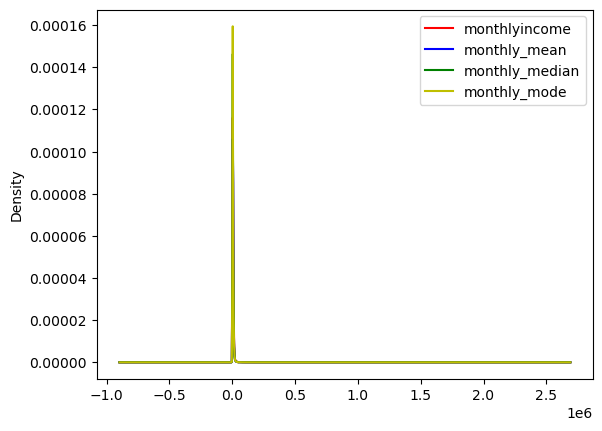

In [32]:
# checking std and distribution and then will decide:

fig = plt.figure()
ax = fig.add_subplot(1,1,1)


training_data['MonthlyIncome'].plot(kind = 'kde' , ax = ax , color = 'r' , label = 'monthlyincome')
training_data['MonthlyIncome_mean'].plot(kind = 'kde' , ax = ax , color = 'b' , label = 'monthly_mean')
training_data['MonthlyIncome_median'].plot(kind = 'kde',ax=ax , color = 'g' , label = 'monthly_median')
training_data['MonthlyIncome_mode'].plot(kind = 'kde' , ax = ax  ,color = 'y' , label = 'monthly_mode')

plt.legend(loc = 0)
plt.show()

In [33]:
print('std for original feature : ',training_data['MonthlyIncome'].std())
print('std for mean feature : ',training_data["MonthlyIncome_mean"].std())
print('std for median feature : ',training_data['MonthlyIncome_median'].std())
print('std for mode feature : ',training_data["MonthlyIncome_mode"].std())

std for original feature :  12382.00036449975
std for mean feature :  11090.888811194223
std for median feature :  11102.22040556871
std for mode feature :  11110.55550843074


Since std is very close I am selecting mode for replacing Null value if Monthly income column:

In [34]:
training_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad,MonthlyIncome_mean,MonthlyIncome_median,MonthlyIncome_mode
87935,0.0,0.889997,60.0,Male,Central,NaN,Rented,Non-officer,Graduate,0.0,2252.000000,5.0,0.0,0.0,0.0,0.0,Good,6659.22741,5400.0,5000.0
3892,0.0,1.000000,34.0,Female,South,4325.0,Ownhouse,Self_Emp,Matric,0.0,0.058946,2.0,0.0,0.0,0.0,0.0,Good,4325.00000,4325.0,4325.0
41404,0.0,1.000000,25.0,Male,North,2317.0,Ownhouse,Officer1,Post-Grad,0.0,0.153581,2.0,0.0,0.0,0.0,0.0,Good,2317.00000,2317.0,2317.0
91124,0.0,0.320767,59.0,Male,Central,4666.0,Rented,Non-officer,Graduate,0.0,0.401757,7.0,0.0,2.0,0.0,0.0,Good,4666.00000,4666.0,4666.0
67372,1.0,1.000000,54.0,Male,West,NaN,Ownhouse,Self_Emp,Graduate,3.0,779.000000,5.0,2.0,1.0,2.0,NaN,Bad,6659.22741,5400.0,5000.0


In [35]:
training_data = training_data.drop(['MonthlyIncome' , 'MonthlyIncome_mean' , 'MonthlyIncome_median'],axis = 1)

In [36]:
training_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad,MonthlyIncome_mode
87935,0.0,0.889997,60.0,Male,Central,Rented,Non-officer,Graduate,0.0,2252.000000,5.0,0.0,0.0,0.0,0.0,Good,5000.0
3892,0.0,1.000000,34.0,Female,South,Ownhouse,Self_Emp,Matric,0.0,0.058946,2.0,0.0,0.0,0.0,0.0,Good,4325.0
41404,0.0,1.000000,25.0,Male,North,Ownhouse,Officer1,Post-Grad,0.0,0.153581,2.0,0.0,0.0,0.0,0.0,Good,2317.0
91124,0.0,0.320767,59.0,Male,Central,Rented,Non-officer,Graduate,0.0,0.401757,7.0,0.0,2.0,0.0,0.0,Good,4666.0
67372,1.0,1.000000,54.0,Male,West,Ownhouse,Self_Emp,Graduate,3.0,779.000000,5.0,2.0,1.0,2.0,NaN,Bad,5000.0


In [37]:
training_data.isnull().sum()

NPA Status                                 0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
Gender                                     0
Region                                     0
Rented_OwnHouse                            0
Occupation                                 0
Education                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      2689
Good_Bad                                   0
MonthlyIncome_mode                         0
dtype: int64

In [38]:
# but in the test data also we are having monthly feature:
testing_data.isnull().sum()

NPA Status                                 0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
Gender                                     0
Region                                     0
MonthlyIncome                           9865
Rented_OwnHouse                            0
Occupation                                 0
Education                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      1235
Good_Bad                                   0
dtype: int64

In [39]:
# Monthly income null values in test_data should be replaced with mode value because it has been replaced by mode in training data

testing_data['MonthlyIncome'] = testing_data['MonthlyIncome'].fillna(mode_1)

In [40]:
testing_data.isnull().sum()

NPA Status                                 0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
Gender                                     0
Region                                     0
MonthlyIncome                              0
Rented_OwnHouse                            0
Occupation                                 0
Education                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      1235
Good_Bad                                   0
dtype: int64

In [41]:
# come back to train data:
training_data.isnull().sum()

NPA Status                                 0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
Gender                                     0
Region                                     0
Rented_OwnHouse                            0
Occupation                                 0
Education                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      2689
Good_Bad                                   0
MonthlyIncome_mode                         0
dtype: int64

In [42]:
# handling missing values for NUmber of Dependents:

training_data['NumberOfDependents'].isnull().sum()

2689

In [43]:
training_data["NumberOfDependents"]

87935     0.0
3892      0.0
41404     0.0
91124     0.0
67372     NaN
         ... 
119879    3.0
103694    1.0
131932      0
146867      0
121958    0.0
Name: NumberOfDependents, Length: 100500, dtype: object

In [44]:
# handling missing values for NUmber of Dependents:

training_data['NumberOfDependents'].dtype

dtype('O')

In [45]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49500 entries, 59770 to 61721
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   NPA Status                            49500 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  49500 non-null  float64
 2   age                                   49500 non-null  float64
 3   Gender                                49500 non-null  object 
 4   Region                                49500 non-null  object 
 5   MonthlyIncome                         49500 non-null  float64
 6   Rented_OwnHouse                       49500 non-null  object 
 7   Occupation                            49500 non-null  object 
 8   Education                             49500 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  49500 non-null  float64
 10  DebtRatio                             49500 non-null  float64
 11  NumberOfOpe

In [46]:
a = '12'
int(a)

12

In [47]:
training_data['NumberOfDependents'] = pd.to_numeric(training_data['NumberOfDependents'])

In [48]:
training_data['NumberOfDependents'].dtype

dtype('float64')

In [49]:
mean_2 = training_data['NumberOfDependents'].mean()
median_2 = training_data['NumberOfDependents'].median()
mode_2 = training_data["NumberOfDependents"].mode()[0]

In [50]:
print(f"The Mean value is  = {mean_2}")
print(f"The Median value is = {median_2}")
print(f"The mode value is = {mode_2}")

The Mean value is  = 0.7641574056087761
The Median value is = 0.0
The mode value is = 0.0


In [51]:
# Replacing the values and finding the best one:

def mean_replace_1(training_data , var ,value):
    training_data[var+'_mean'] = training_data[var].fillna(value)
    
mean_replace_1(training_data , 'NumberOfDependents' , mean_2)

In [52]:
# Replacing the values and finding the best one:

def mean_replace_1(training_data , var ,value):
    training_data[var+'_median'] = training_data[var].fillna(value)
    
mean_replace_1(training_data , 'NumberOfDependents' , median_2)

In [53]:
# Replacing the values and finding the best one:

def mean_replace_1(training_data , var ,value):
    training_data[var+'_mode'] = training_data[var].fillna(value)
    
mean_replace_1(training_data , 'NumberOfDependents' , mode_2)

In [54]:
training_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad,MonthlyIncome_mode,NumberOfDependents_mean,NumberOfDependents_median,NumberOfDependents_mode
87935,0.0,0.889997,60.0,Male,Central,Rented,Non-officer,Graduate,0.0,2252.000000,5.0,0.0,0.0,0.0,0.0,Good,5000.0,0.000000,0.0,0.0
3892,0.0,1.000000,34.0,Female,South,Ownhouse,Self_Emp,Matric,0.0,0.058946,2.0,0.0,0.0,0.0,0.0,Good,4325.0,0.000000,0.0,0.0
41404,0.0,1.000000,25.0,Male,North,Ownhouse,Officer1,Post-Grad,0.0,0.153581,2.0,0.0,0.0,0.0,0.0,Good,2317.0,0.000000,0.0,0.0
91124,0.0,0.320767,59.0,Male,Central,Rented,Non-officer,Graduate,0.0,0.401757,7.0,0.0,2.0,0.0,0.0,Good,4666.0,0.000000,0.0,0.0
67372,1.0,1.000000,54.0,Male,West,Ownhouse,Self_Emp,Graduate,3.0,779.000000,5.0,2.0,1.0,2.0,NaN,Bad,5000.0,0.764157,0.0,0.0


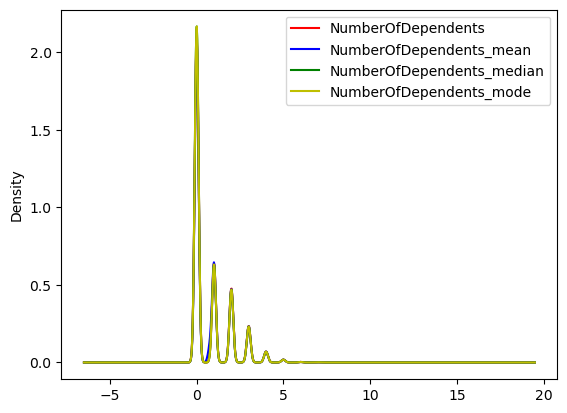

In [55]:
# Lets check the distributon :

# checking std and distribution and then will decide:

fig = plt.figure()
ax = fig.add_subplot(1,1,1)


training_data['NumberOfDependents'].plot(kind = 'kde' , ax = ax , color = 'r' , label = 'NumberOfDependents')
training_data['NumberOfDependents_mean'].plot(kind = 'kde' , ax = ax , color = 'b' , label = 'NumberOfDependents_mean')
training_data['NumberOfDependents_median'].plot(kind = 'kde',ax=ax , color = 'g' , label = 'NumberOfDependents_median')
training_data['NumberOfDependents_mode'].plot(kind = 'kde' , ax = ax  ,color = 'y' , label = 'NumberOfDependents_mode')

plt.legend(loc = 0)
plt.show()

In [56]:
print('std for original feature : ',training_data['NumberOfDependents'].std())
print('std for mean feature : ',training_data["NumberOfDependents_mean"].std())
print('std for median feature : ',training_data['NumberOfDependents_median'].std())
print('std for mode feature : ',training_data["NumberOfDependents_mode"].std())

std for original feature :  1.118102950299523
std for mean feature :  1.1030432788402802
std for median feature :  1.1099146466320464
std for mode feature :  1.1099146466320464


In [57]:
# Since Mean is good I am taking Mean and ignoring Median and mode and original feature:


training_data = training_data.drop(['NumberOfDependents','NumberOfDependents_mode','NumberOfDependents_mean'],axis = 1)

In [58]:
training_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,Good_Bad,MonthlyIncome_mode,NumberOfDependents_median
87935,0.0,0.889997,60.0,Male,Central,Rented,Non-officer,Graduate,0.0,2252.000000,5.0,0.0,0.0,0.0,Good,5000.0,0.0
3892,0.0,1.000000,34.0,Female,South,Ownhouse,Self_Emp,Matric,0.0,0.058946,2.0,0.0,0.0,0.0,Good,4325.0,0.0
41404,0.0,1.000000,25.0,Male,North,Ownhouse,Officer1,Post-Grad,0.0,0.153581,2.0,0.0,0.0,0.0,Good,2317.0,0.0
91124,0.0,0.320767,59.0,Male,Central,Rented,Non-officer,Graduate,0.0,0.401757,7.0,0.0,2.0,0.0,Good,4666.0,0.0
67372,1.0,1.000000,54.0,Male,West,Ownhouse,Self_Emp,Graduate,3.0,779.000000,5.0,2.0,1.0,2.0,Bad,5000.0,0.0


In [59]:
training_data.isnull().sum()

NPA Status                              0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
Gender                                  0
Region                                  0
Rented_OwnHouse                         0
Occupation                              0
Education                               0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
Good_Bad                                0
MonthlyIncome_mode                      0
NumberOfDependents_median               0
dtype: int64

In [60]:
testing_data['NumberOfDependents'].dtype

dtype('O')

In [61]:
# we need to replace NumberOfDependents null values in test data with same mean value which is in training data:

testing_data['NumberOfDependents'] = pd.to_numeric(testing_data['NumberOfDependents'])
testing_data['NumberOfDependents'] = testing_data['NumberOfDependents'].fillna(mean_2)


In [62]:
testing_data.isnull().sum()

NPA Status                              0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
Gender                                  0
Region                                  0
MonthlyIncome                           0
Rented_OwnHouse                         0
Occupation                              0
Education                               0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
Good_Bad                                0
dtype: int64


so we solved Null values for Training and test datasets: 

We need to check whether any outliers in train and test data for Numerical variables:

## Checking Normal Distribution for each Numerical feature in Training_data:

Normal distribution is for Numerical varibales:

In [63]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100500 entries, 87935 to 121958
Data columns (total 17 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            100500 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  100500 non-null  float64
 2   age                                   100500 non-null  float64
 3   Gender                                100500 non-null  object 
 4   Region                                100500 non-null  object 
 5   Rented_OwnHouse                       100500 non-null  object 
 6   Occupation                            100500 non-null  object 
 7   Education                             100500 non-null  object 
 8   NumberOfTime30-59DaysPastDueNotWorse  100500 non-null  float64
 9   DebtRatio                             100500 non-null  float64
 10  NumberOfOpenCreditLinesAndLoans       100500 non-null  float64
 

Normal distribution is for Numerical varibales:

In [64]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100500 entries, 87935 to 121958
Data columns (total 17 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            100500 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  100500 non-null  float64
 2   age                                   100500 non-null  float64
 3   Gender                                100500 non-null  object 
 4   Region                                100500 non-null  object 
 5   Rented_OwnHouse                       100500 non-null  object 
 6   Occupation                            100500 non-null  object 
 7   Education                             100500 non-null  object 
 8   NumberOfTime30-59DaysPastDueNotWorse  100500 non-null  float64
 9   DebtRatio                             100500 non-null  float64
 10  NumberOfOpenCreditLinesAndLoans       100500 non-null  float64
 

In [65]:
# out of 17 features in training data I want only numerical features for handling outliers:

training_data_numerical = training_data.select_dtypes(exclude='object')

In [66]:
training_data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100500 entries, 87935 to 121958
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            100500 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  100500 non-null  float64
 2   age                                   100500 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  100500 non-null  float64
 4   DebtRatio                             100500 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       100500 non-null  float64
 6   NumberOfTimes90DaysLate               100500 non-null  float64
 7   NumberRealEstateLoansOrLines          100500 non-null  float64
 8   NumberOfTime60-89DaysPastDueNotWorse  100500 non-null  float64
 9   MonthlyIncome_mode                    100500 non-null  float64
 10  NumberOfDependents_median             100500 non-null  float64
d

In [67]:
import seaborn as sns 

In [68]:
training_data_numerical.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_mode', 'NumberOfDependents_median'],
      dtype='object')

In [69]:
training_data_numerical['NPA Status']

87935     0.0
3892      0.0
41404     0.0
91124     0.0
67372     1.0
         ... 
119879    0.0
103694    0.0
131932    0.0
146867    0.0
121958    0.0
Name: NPA Status, Length: 100500, dtype: float64

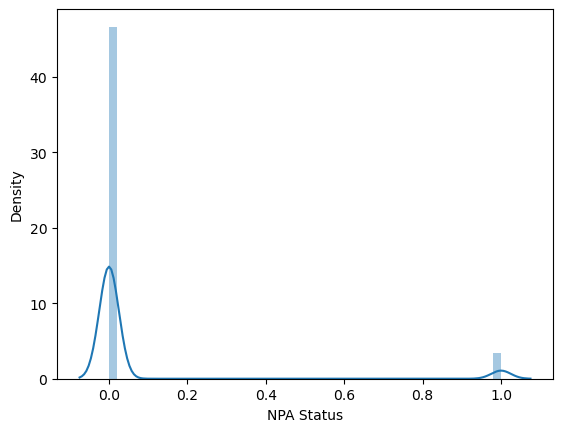

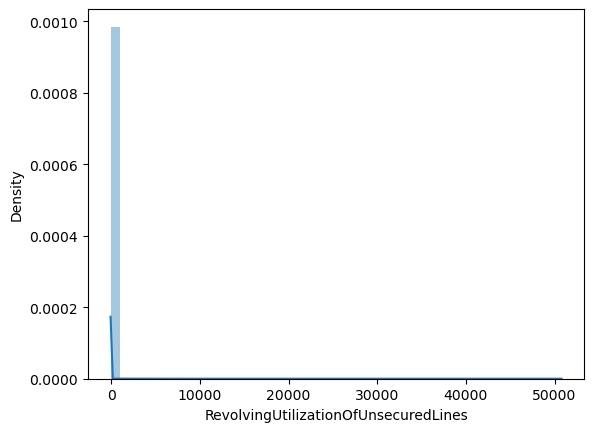

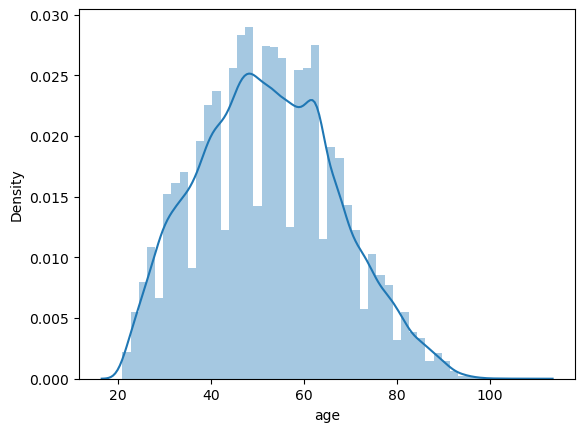

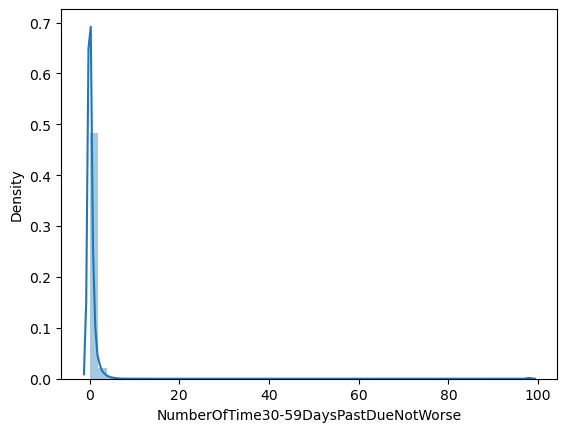

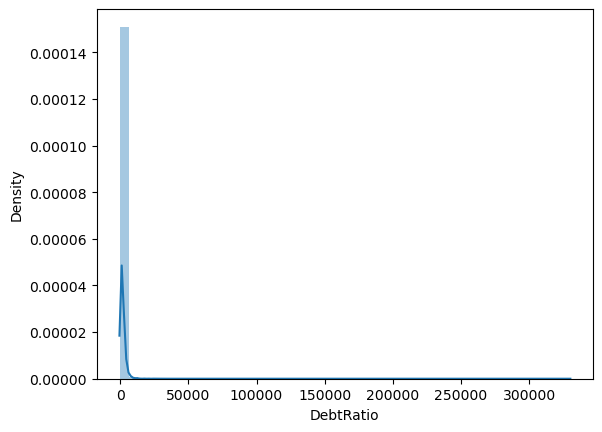

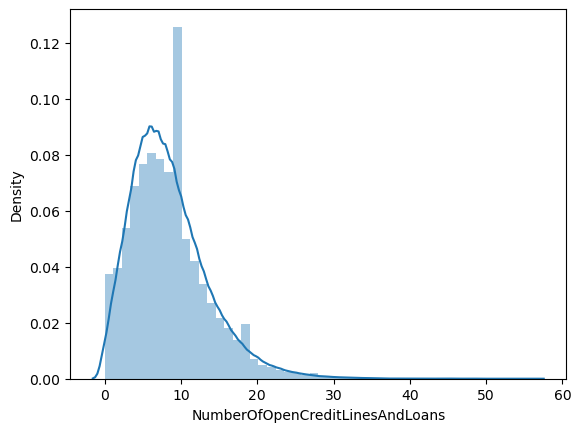

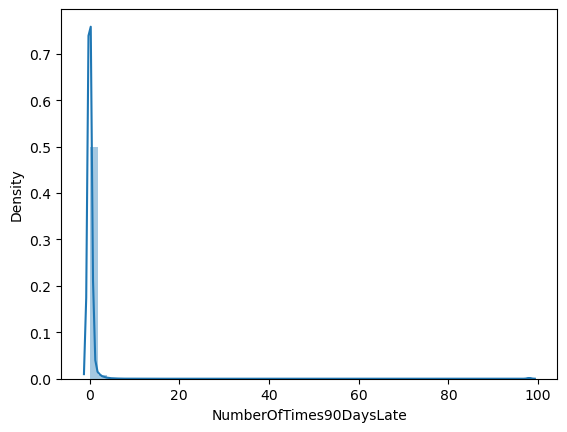

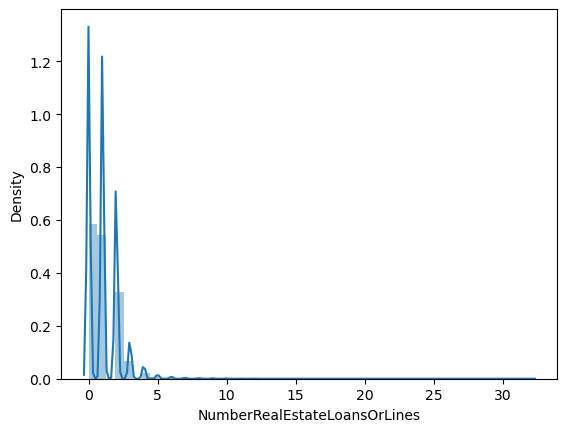

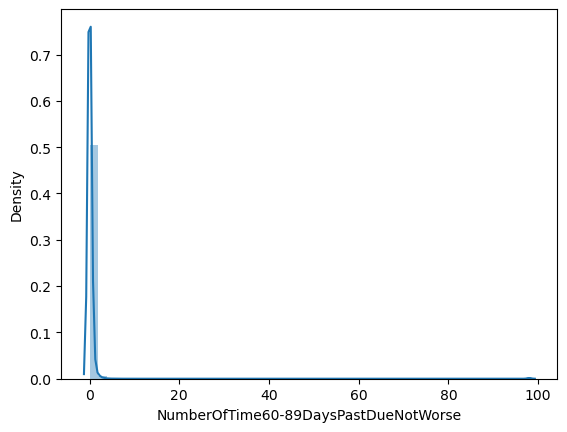

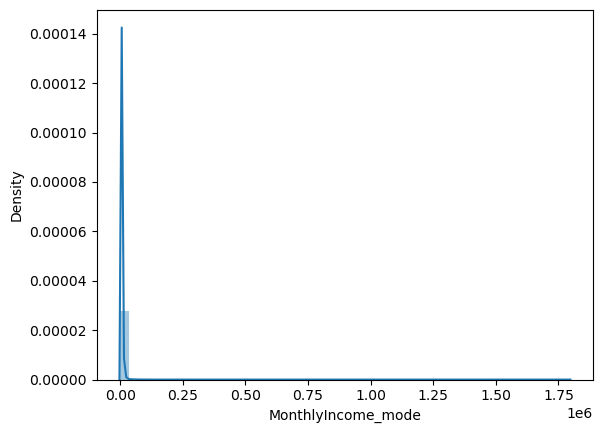

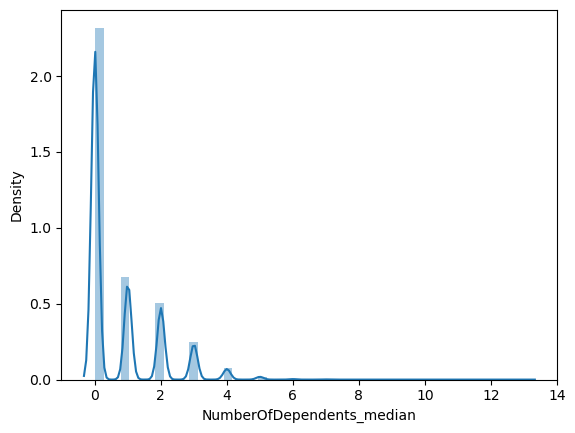

In [70]:
for i in training_data_numerical.columns:
    sns.distplot(training_data_numerical[i])
    plt.show()

In [71]:
training_data_numerical.shape

(100500, 11)

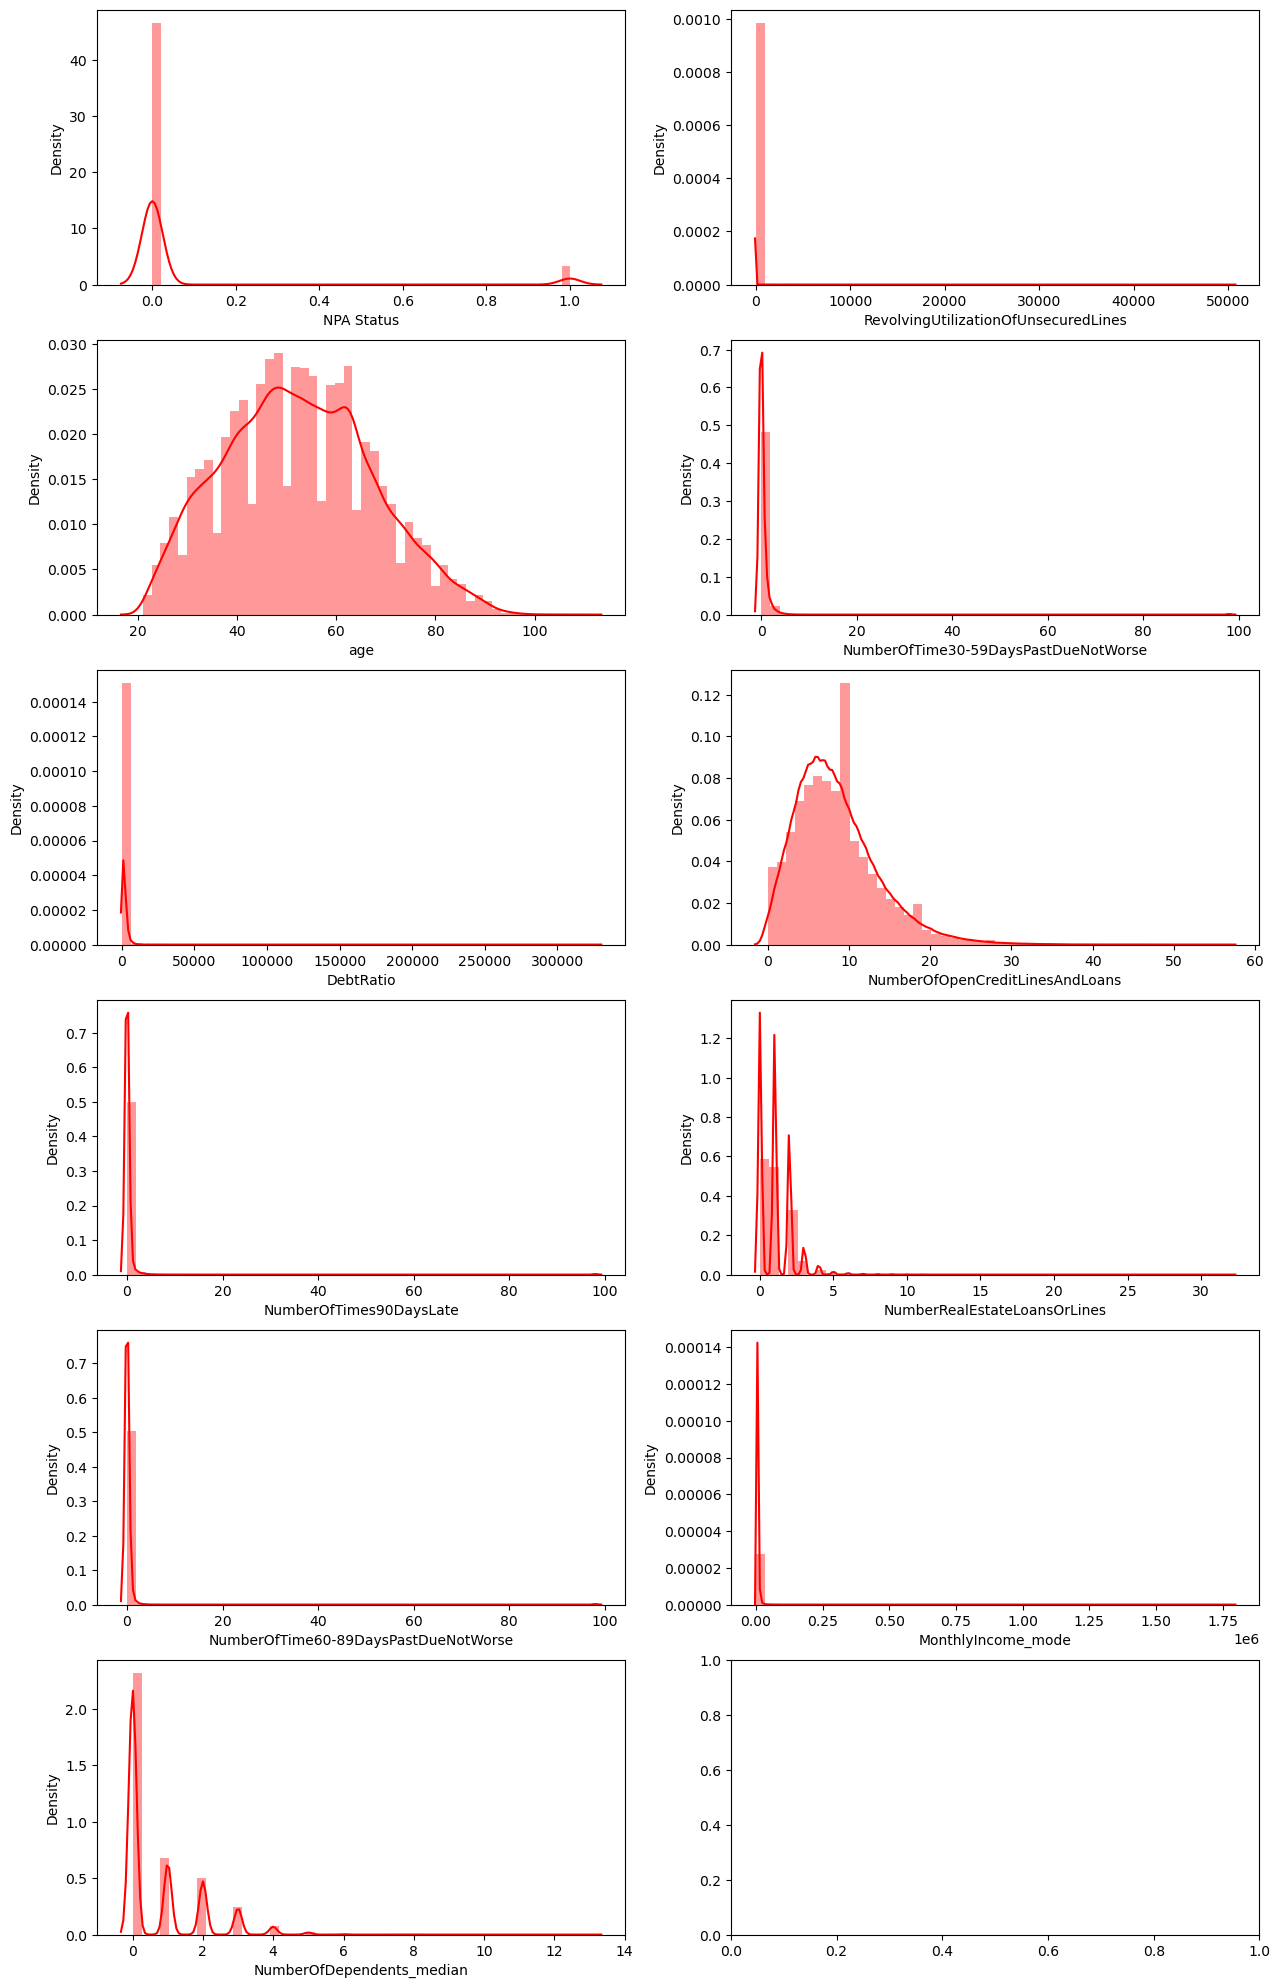

In [72]:
## checking ND for each features in training numerical data:


f = training_data_numerical.columns

fig , ax = plt.subplots(6,2, figsize = (15,25))

for i , subplot in zip(f, ax.flatten()):
    sns.distplot(training_data_numerical[i] , ax = subplot , color = 'r')


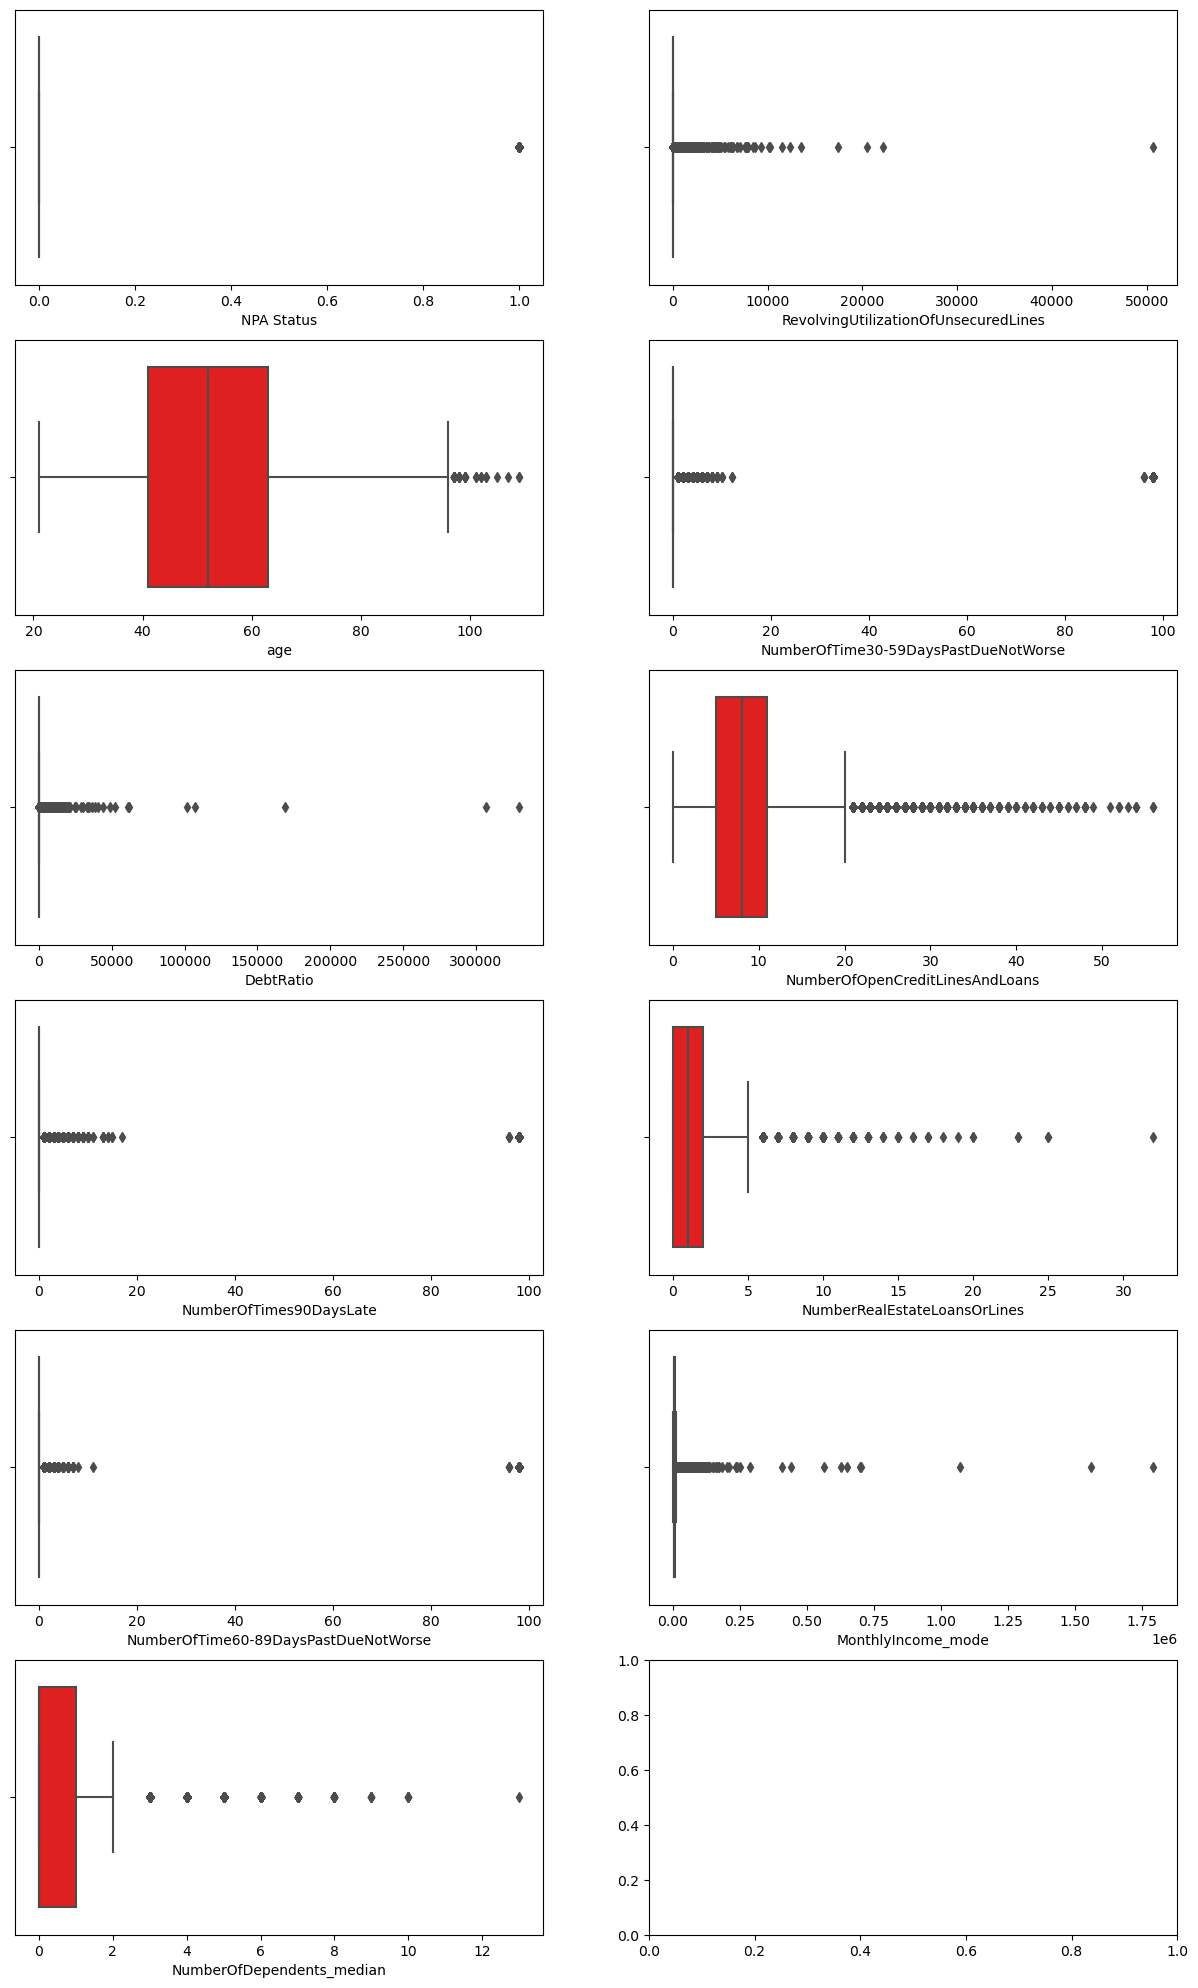

In [73]:
# checking the outliers:

f = training_data_numerical.columns

fig , ax = plt.subplots(6,2, figsize = (15,25))

for i , subplot in zip(f, ax.flatten()):
    sns.boxplot(x = training_data_numerical[i] , ax = subplot , color = 'r')


## Now We got a clear idea about training numerical data so I am going to Handle outliers:

- for handling outliers I am using Variable Transformation technique:

## Using Variable Transformation Yeojohnson technique I will try to solve outliers:

In [74]:
training_data_numerical.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_mode', 'NumberOfDependents_median'],
      dtype='object')

In [75]:
import scipy.stats as stats 

In [76]:
def vt(training_data_numerical , var):
    plt.figure(figsize=(9,3))
    plt.subplot(1,3,1)
    plt.title('box_plot')
    sns.boxplot(x = training_data_numerical[var])
    plt.subplot(1,3,2)
    plt.title('hist')
    plt.hist(training_data_numerical[var])
    plt.subplot(1,3,3)
    plt.title('probplot')
    stats.probplot(training_data_numerical[var] , plot = plt)
    plt.show()
    

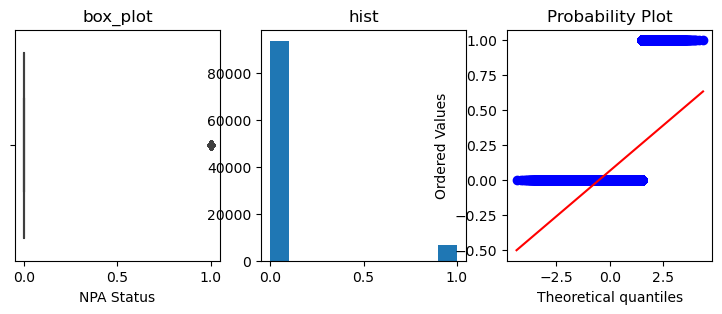

In [77]:
vt(training_data_numerical , 'NPA Status')

In [78]:
### Above is for just checking the distribution now I am using Yeojohnson technique and transorm each numerical feature in training data:

def vt(training_data_numerical , var):
    plt.figure(figsize=(9,3))
    plt.subplot(1,3,1)
    plt.title('box_plot')
    sns.boxplot(x = training_data_numerical[var+'_yeo'])
    plt.subplot(1,3,2)
    plt.title('hist')
    plt.hist(training_data_numerical[var+'_yeo'])
    plt.subplot(1,3,3)
    plt.title('probplot')
    stats.probplot(training_data_numerical[var+'_yeo'] , plot = plt)
    plt.show()
    

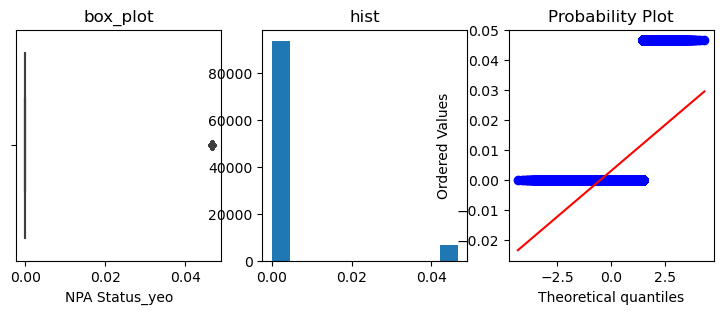

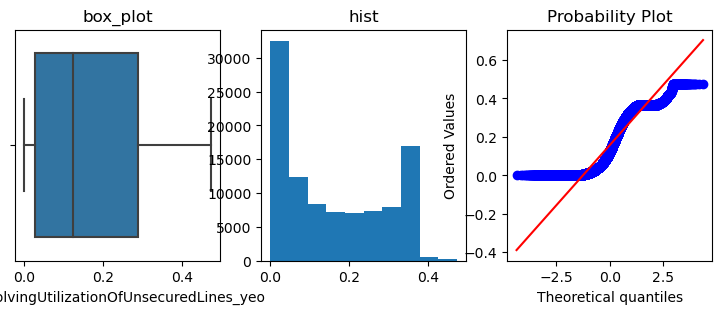

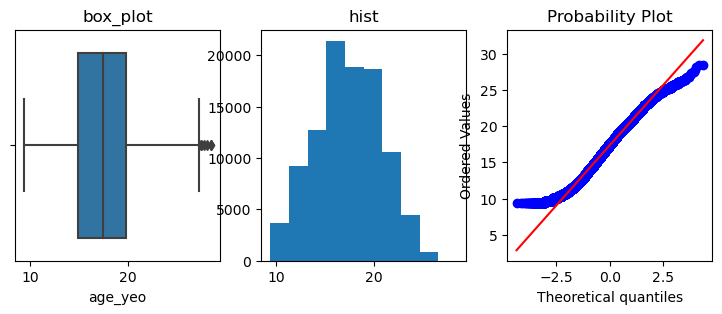

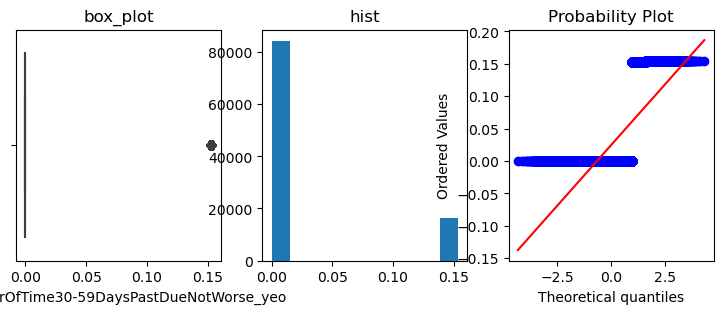

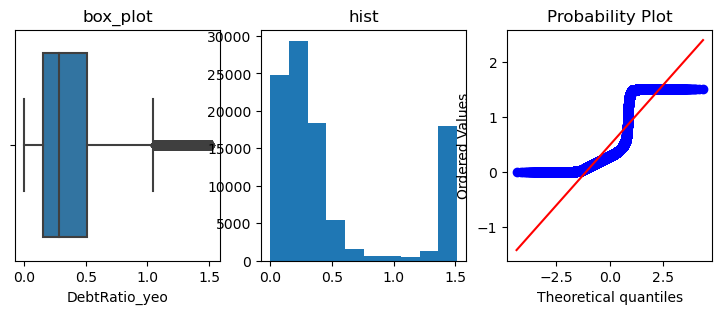

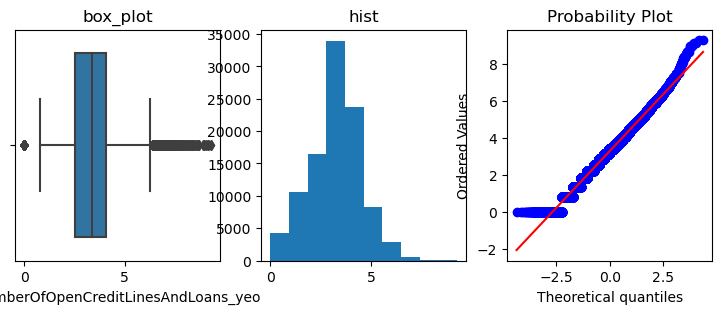

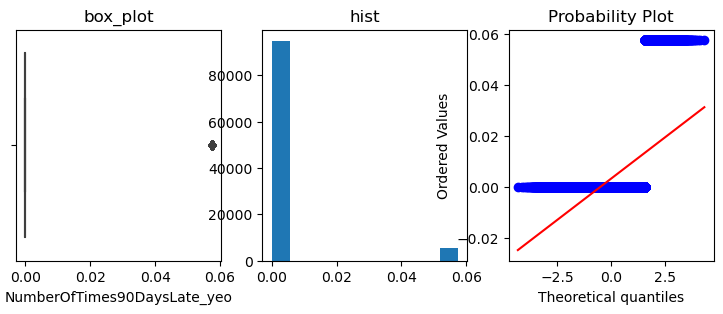

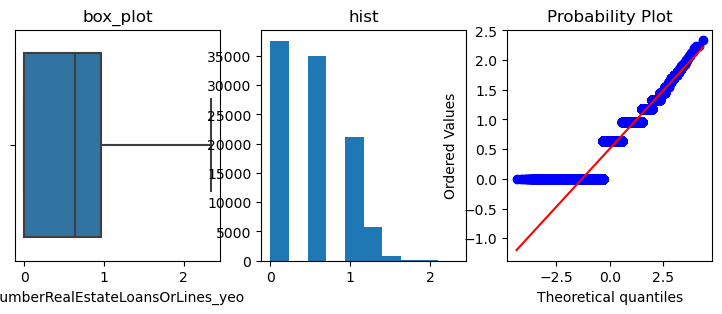

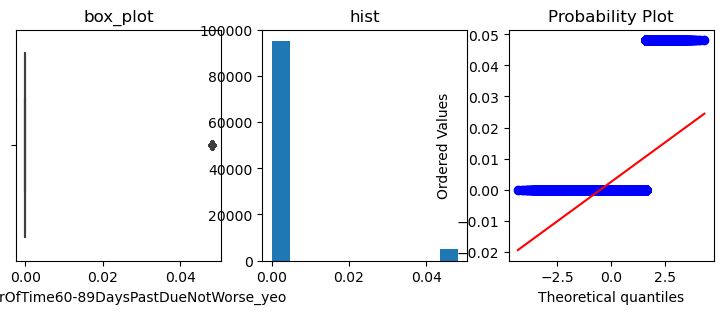

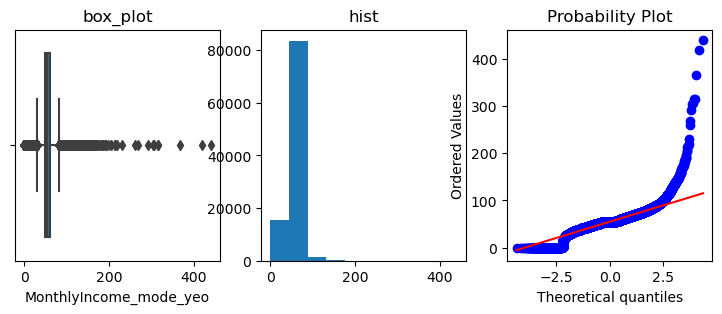

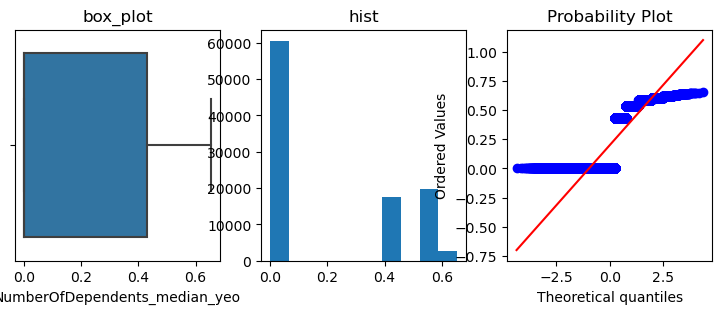

In [79]:
for i in training_data_numerical.columns:
    training_data_numerical[i+'_yeo'] , alpa = stats.yeojohnson(training_data_numerical[i])
    vt(training_data_numerical , i)
    

In [80]:
training_data_numerical.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_mode', 'NumberOfDependents_median', 'NPA Status_yeo',
       'RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo',
       'NumberOfTime30-59DaysPastDueNotWorse_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo', 'NumberOfTimes90DaysLate_yeo',
       'NumberRealEstateLoansOrLines_yeo',
       'NumberOfTime60-89DaysPastDueNotWorse_yeo', 'MonthlyIncome_mode_yeo',
       'NumberOfDependents_median_yeo'],
      dtype='object')

In [81]:
len(training_data_numerical.columns)

22

## Ploting After YeoJohnson Transormation

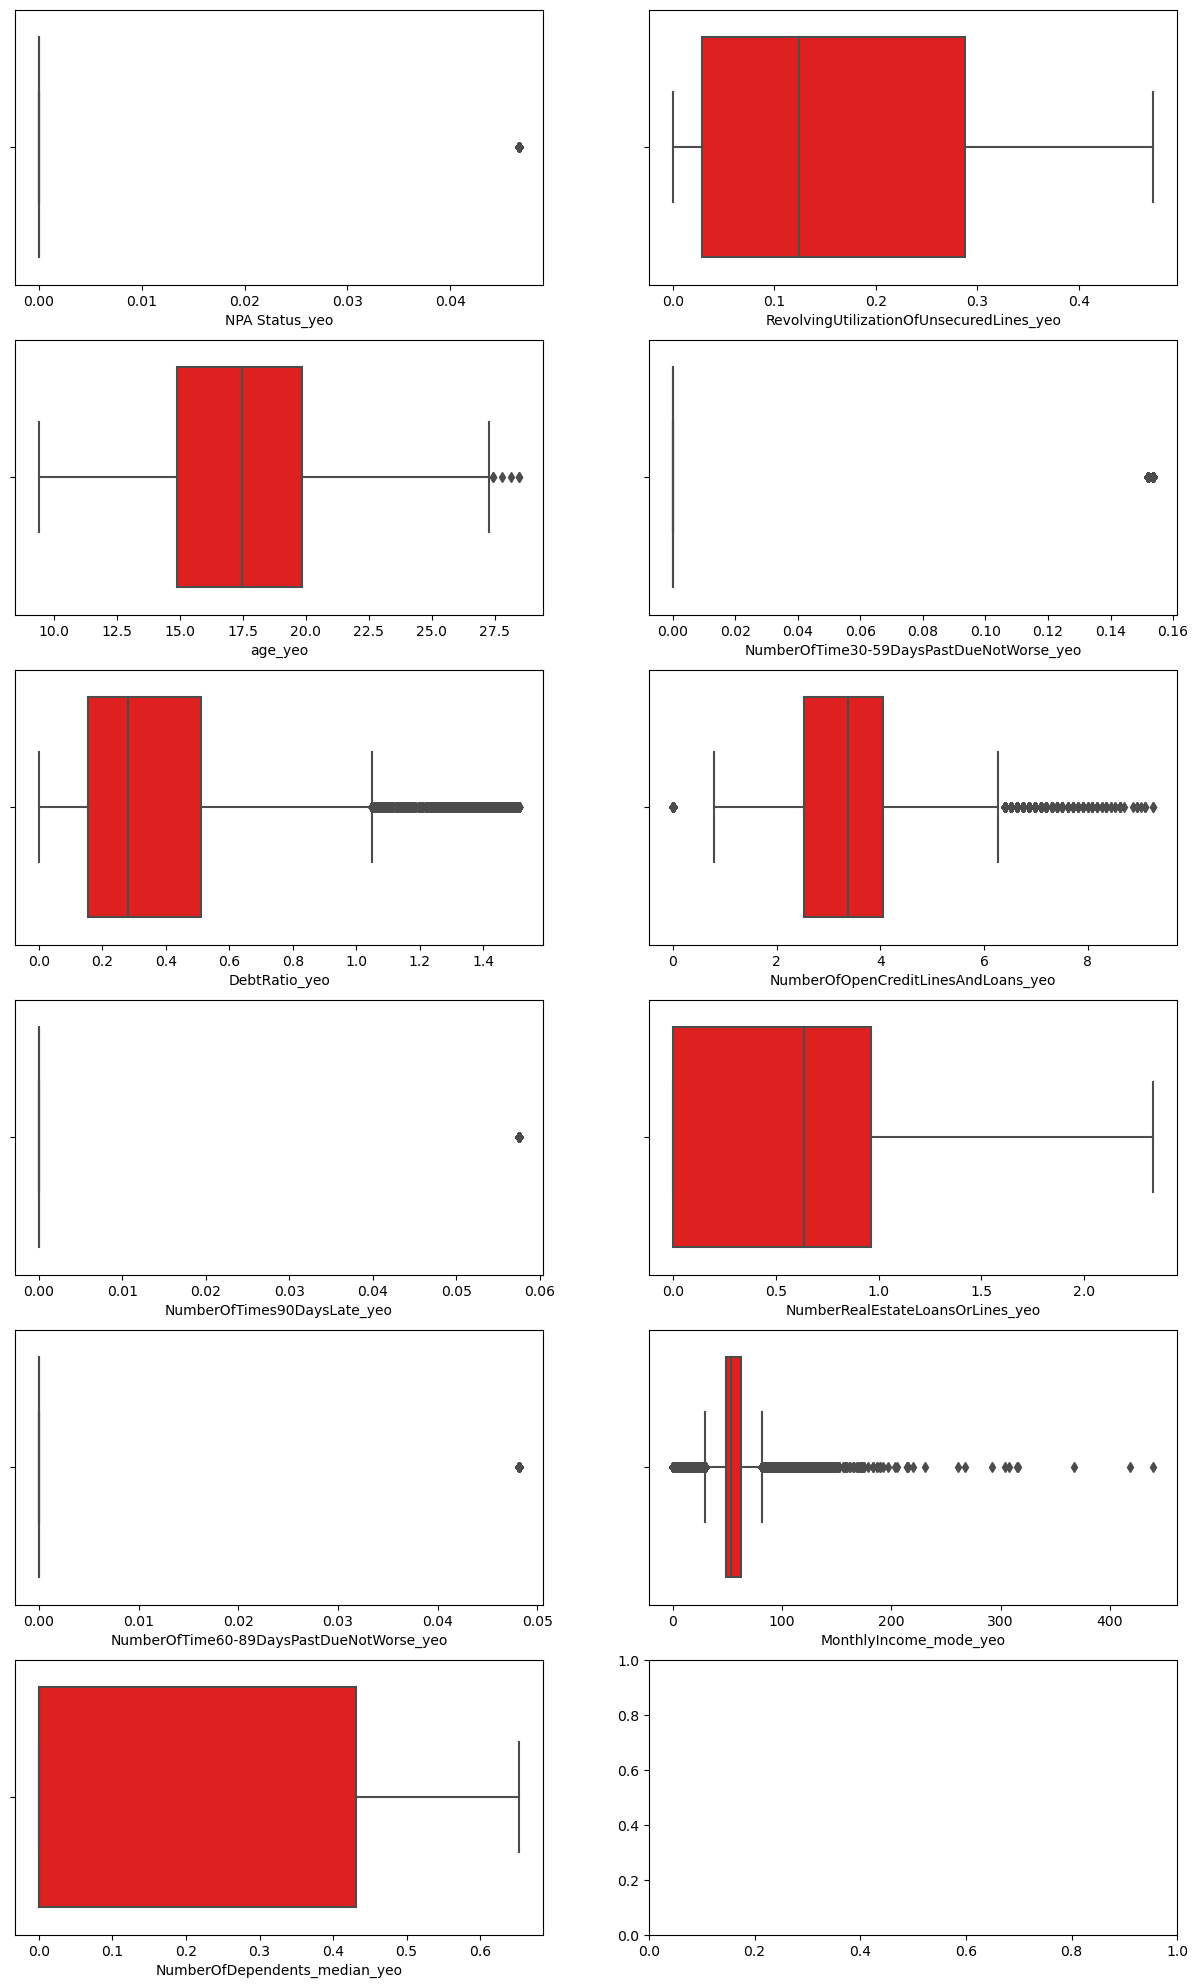

In [82]:
# checking the outliers:

f = ['NPA Status_yeo',
       'RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo',
       'NumberOfTime30-59DaysPastDueNotWorse_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo', 'NumberOfTimes90DaysLate_yeo',
       'NumberRealEstateLoansOrLines_yeo',
       'NumberOfTime60-89DaysPastDueNotWorse_yeo', 'MonthlyIncome_mode_yeo',
       'NumberOfDependents_median_yeo']

fig , ax = plt.subplots(6,2, figsize = (15,25))

for i , subplot in zip(f, ax.flatten()):
    sns.boxplot(x = training_data_numerical[i] , ax = subplot , color = 'r')

In [83]:
# since Before and After Transoramtion I find out there are some features where it holding only unique values so I am going to focus on that:


f = ['NPA Status_yeo',
       'RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo',
       'NumberOfTime30-59DaysPastDueNotWorse_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo', 'NumberOfTimes90DaysLate_yeo',
       'NumberRealEstateLoansOrLines_yeo',
       'NumberOfTime60-89DaysPastDueNotWorse_yeo', 'MonthlyIncome_mode_yeo',
       'NumberOfDependents_median_yeo']
f[0] 

'NPA Status_yeo'

In [84]:
 f[3]

'NumberOfTime30-59DaysPastDueNotWorse_yeo'

In [85]:
 f[6]

'NumberOfTimes90DaysLate_yeo'

In [86]:
 f[8]

'NumberOfTime60-89DaysPastDueNotWorse_yeo'

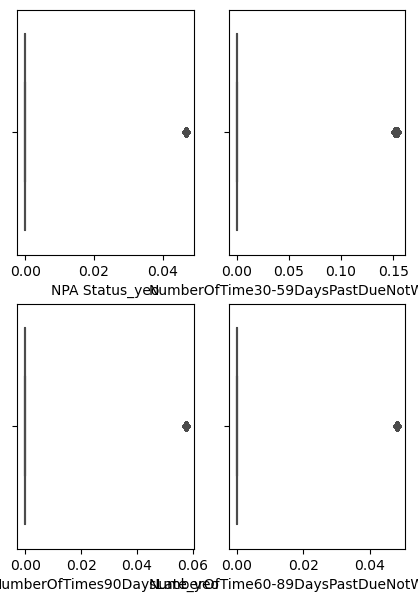

In [87]:
## Working only on unique value features;


f = ['NPA Status_yeo','NumberOfTime30-59DaysPastDueNotWorse_yeo','NumberOfTimes90DaysLate_yeo','NumberOfTime60-89DaysPastDueNotWorse_yeo']


fig , ax = plt.subplots(2,2, figsize = (5,7))

for i , subplot in zip(f, ax.flatten()):
    sns.boxplot(x = training_data_numerical[i] , ax = subplot , color = 'r')


In [88]:
# lets see what are the unique values:
f = ['NPA Status_yeo','NumberOfTime30-59DaysPastDueNotWorse_yeo','NumberOfTimes90DaysLate_yeo','NumberOfTime60-89DaysPastDueNotWorse_yeo']

for i in f:
    print('Number of unique values in ',i,training_data_numerical[i].unique())

Number of unique values in  NPA Status_yeo [-0.          0.04671352]
Number of unique values in  NumberOfTime30-59DaysPastDueNotWorse_yeo [-0.          0.15368769  0.15201502  0.15358536  0.15370194  0.1537062
  0.15370497  0.1537063   0.15370609  0.15370581  0.1537063   0.15370627
  0.15370625  0.15370629]
Number of unique values in  NumberOfTimes90DaysLate_yeo [-0.          0.0575158   0.05751547  0.0575158   0.0575158   0.0575158
  0.0575158   0.0575158   0.0575158 ]
Number of unique values in  NumberOfTime60-89DaysPastDueNotWorse_yeo [-0.          0.04819399  0.04819396  0.04819399  0.04819399  0.04819399
  0.04819399]


In [89]:
training_data_numerical.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_mode', 'NumberOfDependents_median', 'NPA Status_yeo',
       'RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo',
       'NumberOfTime30-59DaysPastDueNotWorse_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo', 'NumberOfTimes90DaysLate_yeo',
       'NumberRealEstateLoansOrLines_yeo',
       'NumberOfTime60-89DaysPastDueNotWorse_yeo', 'MonthlyIncome_mode_yeo',
       'NumberOfDependents_median_yeo'],
      dtype='object')

In [90]:
training_data_numerical = training_data_numerical.drop(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_mode', 'NumberOfDependents_median','NPA Status_yeo','NumberOfTime30-59DaysPastDueNotWorse_yeo','NumberOfTimes90DaysLate_yeo','NumberOfTime60-89DaysPastDueNotWorse_yeo'],axis = 1)


In [91]:
training_data_numerical.head()

,RevolvingUtilizationOfUnsecuredLines_yeo,age_yeo,DebtRatio_yeo,NumberOfOpenCreditLinesAndLoans_yeo,NumberRealEstateLoansOrLines_yeo,MonthlyIncome_mode_yeo,NumberOfDependents_median_yeo
87935,0.350057,19.218351,1.504149,2.531923,-0.000000,53.536898,-0.0
3892,0.363958,13.121298,0.056204,1.352347,-0.000000,50.744568,-0.0
41404,0.363958,10.629580,0.136334,1.352347,-0.000000,40.222715,-0.0
91124,0.210385,19.004802,0.302696,3.116456,0.961442,52.188052,-0.0
67372,0.363958,17.916249,1.494790,2.531923,0.636748,53.536898,-0.0


In [92]:
training_data_numerical.shape

(100500, 7)

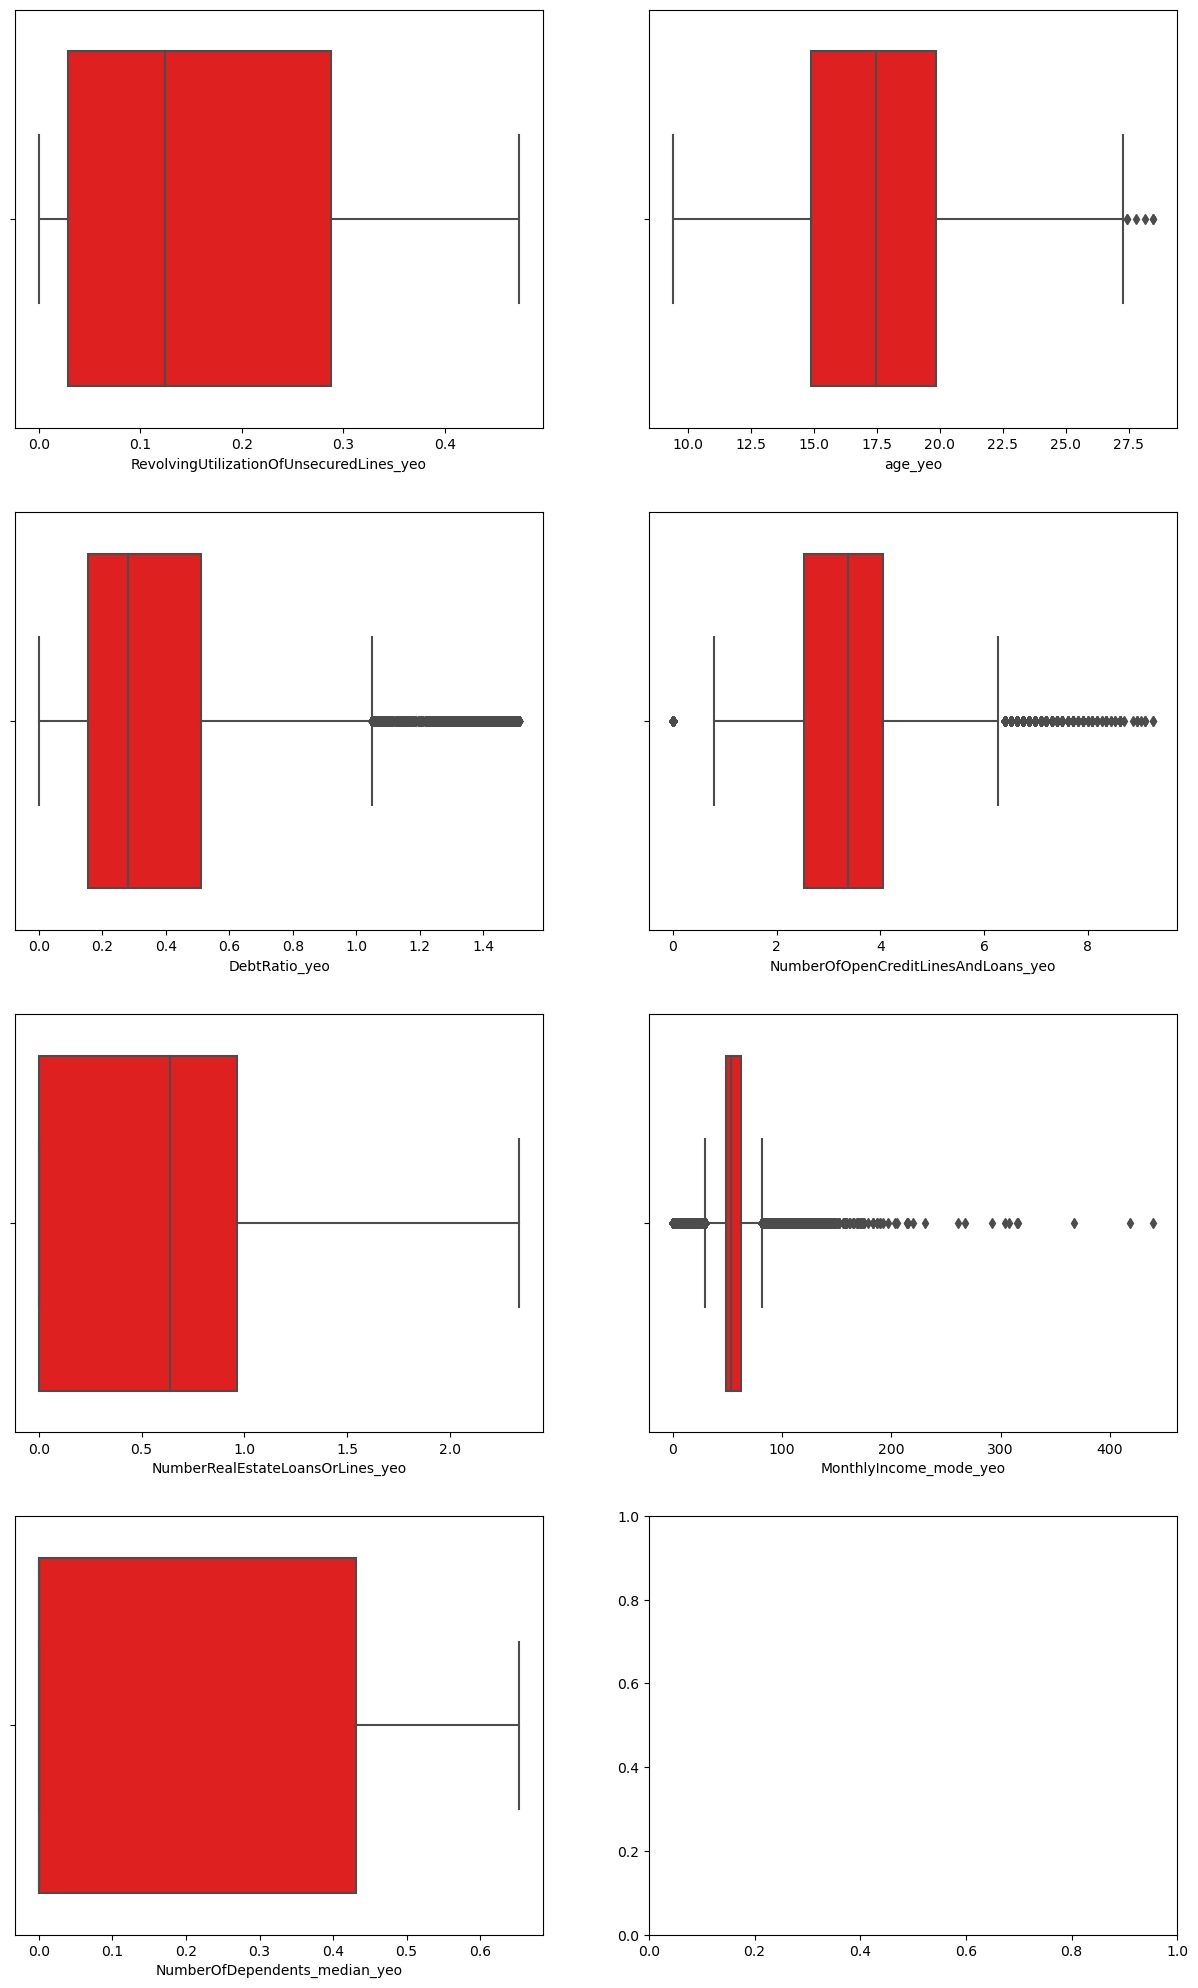

In [93]:
f = training_data_numerical.columns

fig , ax = plt.subplots(4,2, figsize = (15,25))

for i , subplot in zip(f, ax.flatten()):
    sns.boxplot(x = training_data_numerical[i] , ax = subplot , color = 'r')


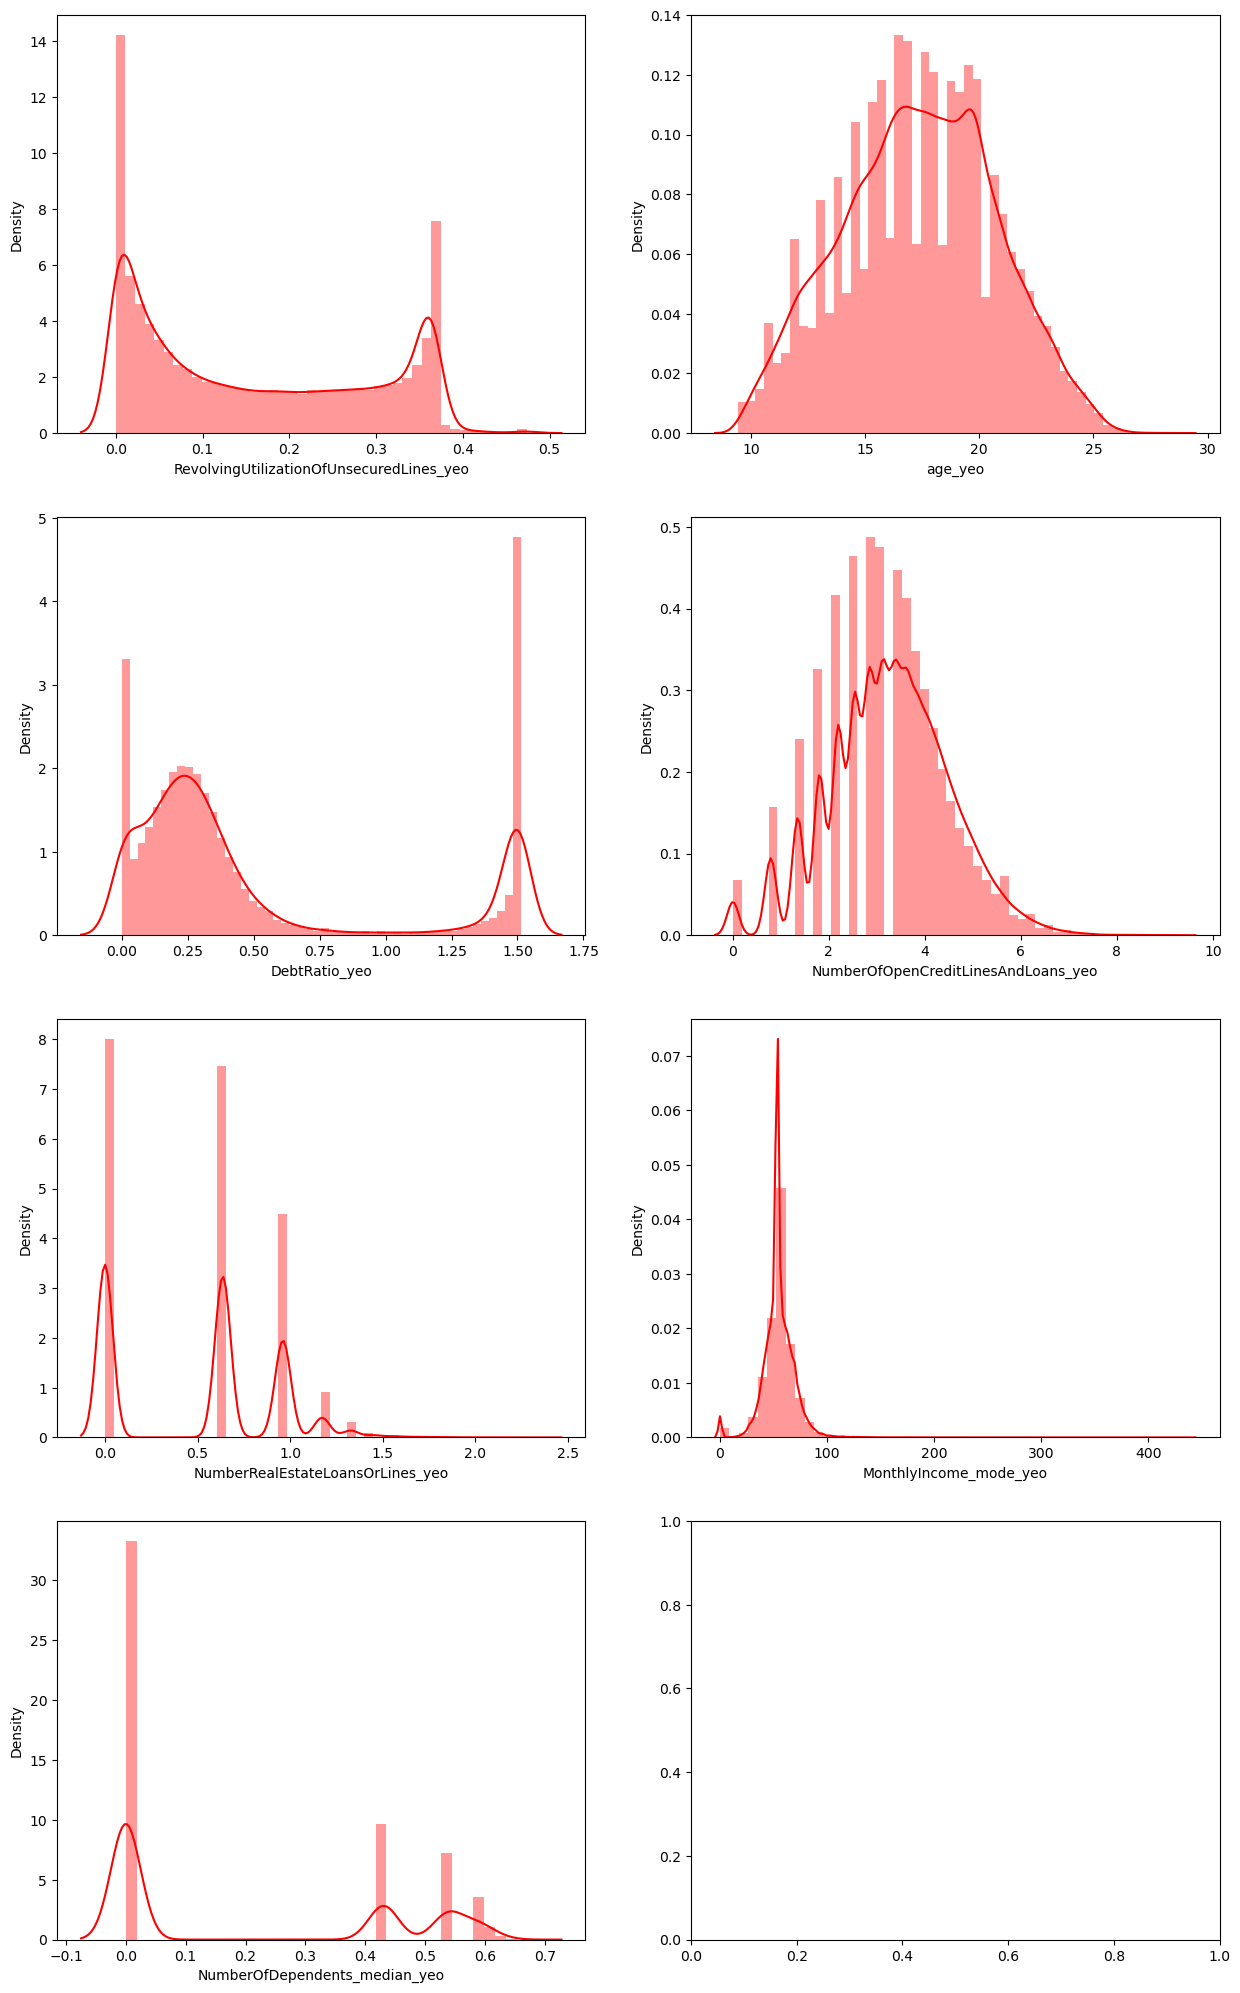

In [94]:
# After Yeo transformation 

f = training_data_numerical.columns

fig , ax = plt.subplots(4,2, figsize = (15,25))

for i , subplot in zip(f, ax.flatten()):
    sns.distplot(training_data_numerical[i] , ax = subplot , color = 'r')

## Same Stuff I am Going to Place in the test data:

- Mainly focus on numerica data only 
- Point 1 = check the distribution ND , Boxplot 
- point 2 = Apply yeojohnson technique 
- Point 3 = Remove features which removed on trainined data 
- Point 4 = check the distribution 

In [95]:
testing_data_num = testing_data.select_dtypes(exclude='object')

In [96]:
testing_data_num.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'MonthlyIncome', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [97]:
testing_data_num.shape

(49500, 11)

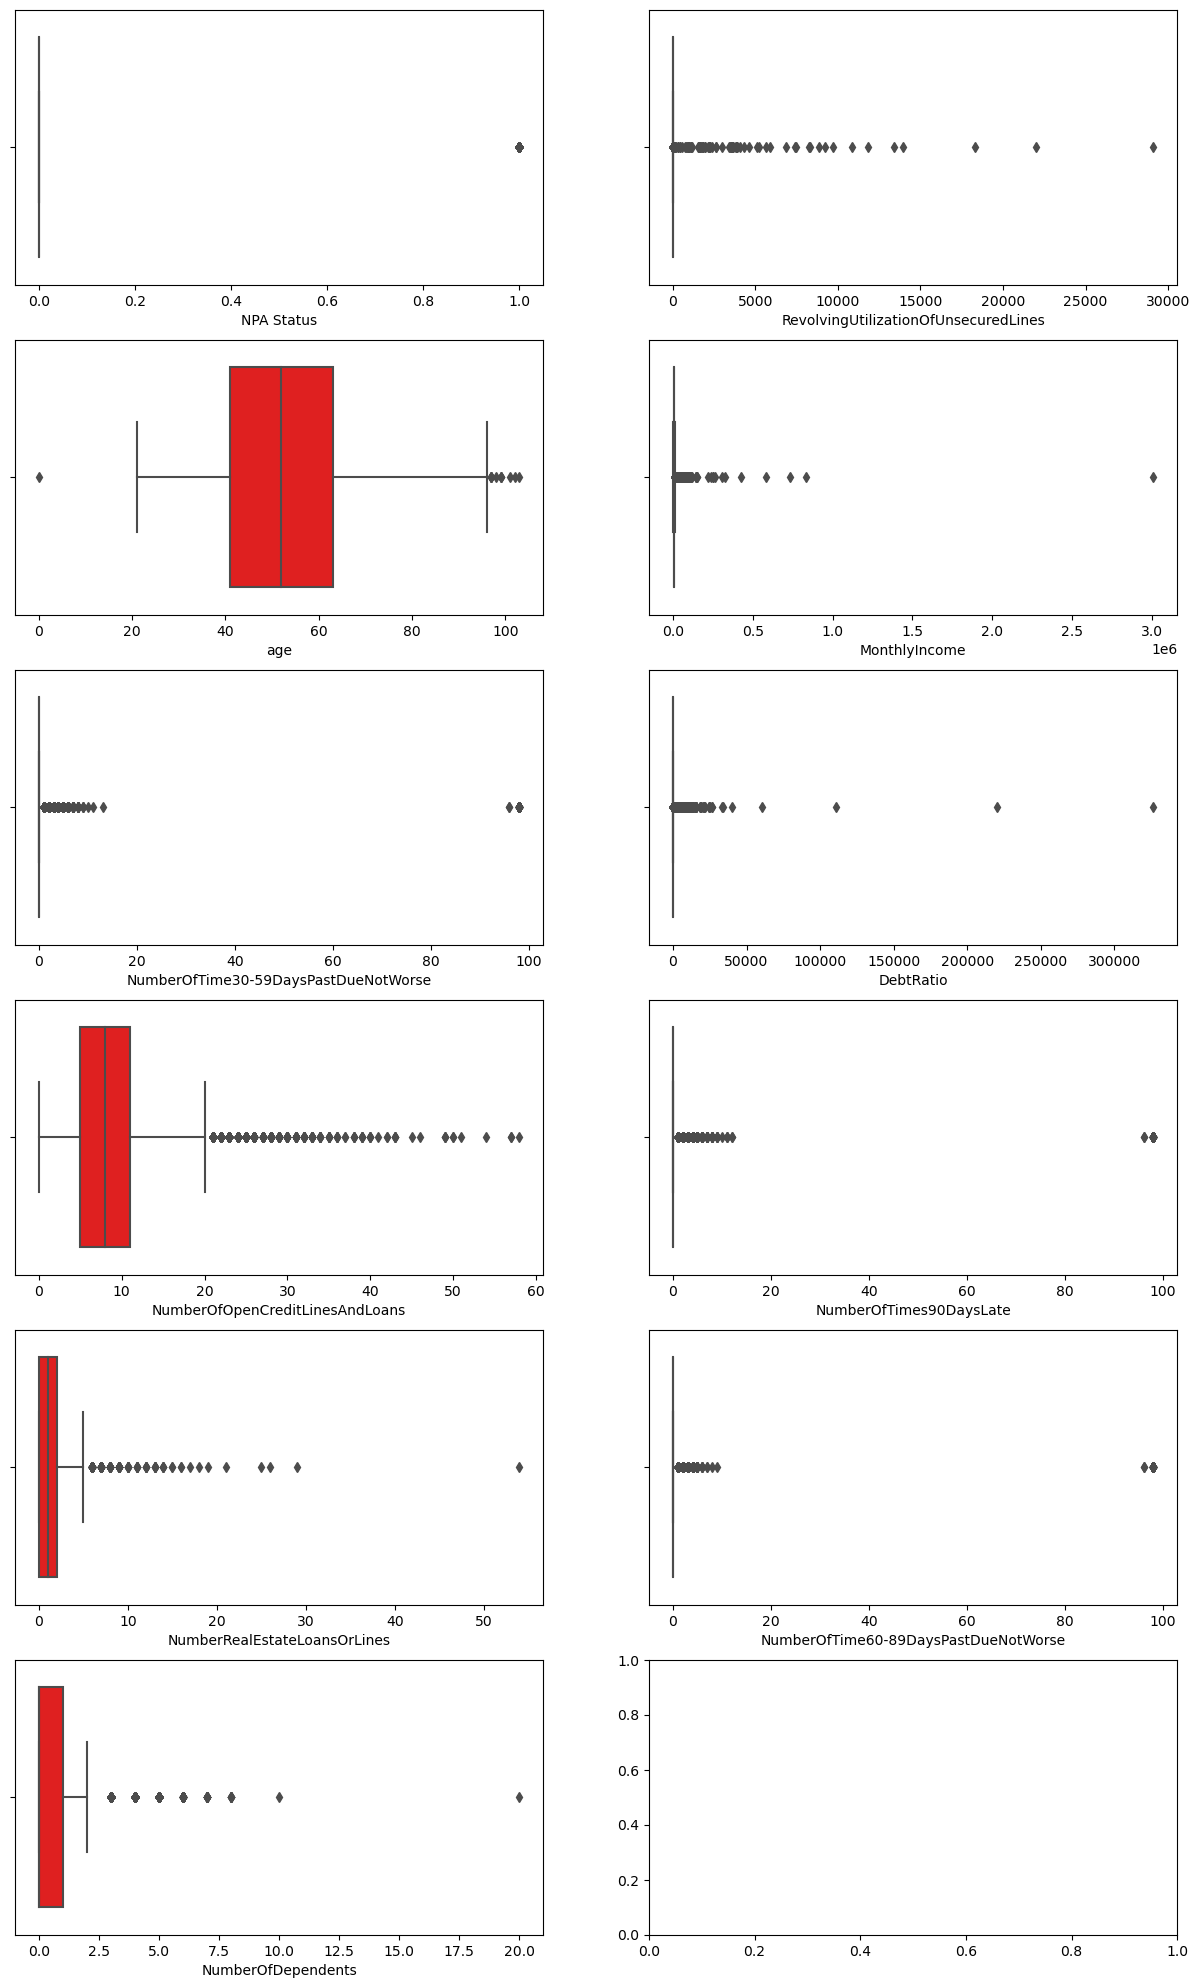

In [98]:
f = testing_data_num.columns

fig , ax = plt.subplots(6,2, figsize = (15,25))

for i , subplot in zip(f, ax.flatten()):
    sns.boxplot(x = testing_data_num[i] , ax = subplot , color = 'r')

In [99]:
# transorm data using yeojohnson technique:

def vt(testing_data_num, var):
    plt.figure(figsize=(9,3))
    plt.subplot(1,3,1)
    plt.title('box_plot')
    sns.boxplot(x = testing_data_num[var+'_yeo'])
    plt.subplot(1,3,2)
    plt.title('hist')
    plt.hist(testing_data_num[var+'_yeo'])
    plt.subplot(1,3,3)
    plt.title('probplot')
    stats.probplot(testing_data_num[var+'_yeo'] , plot = plt)
    plt.show()
    

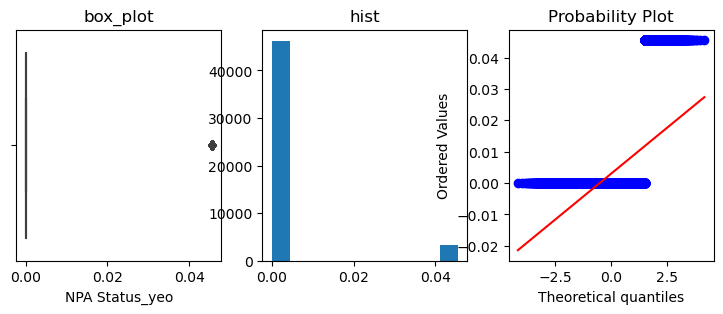

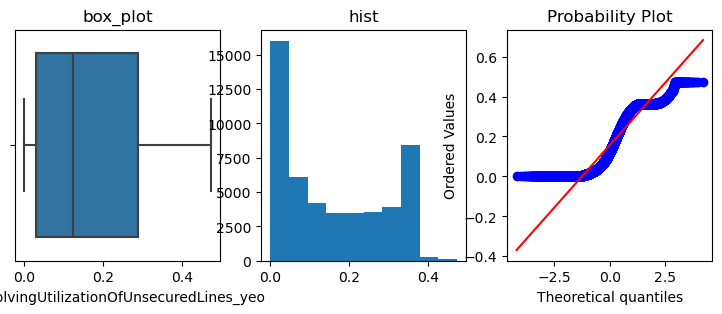

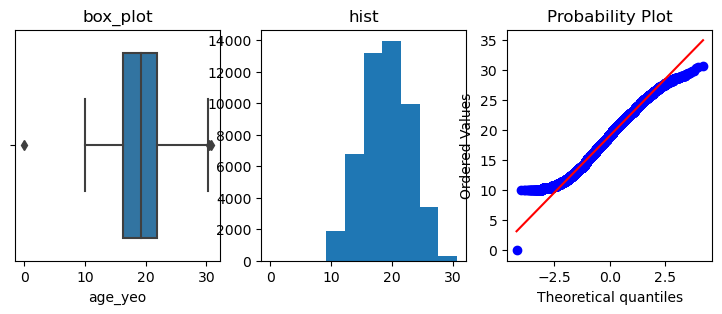

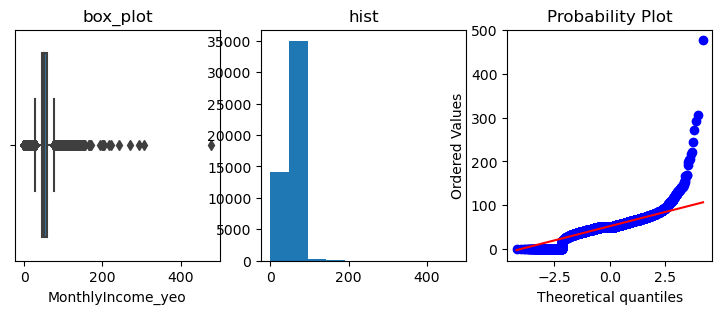

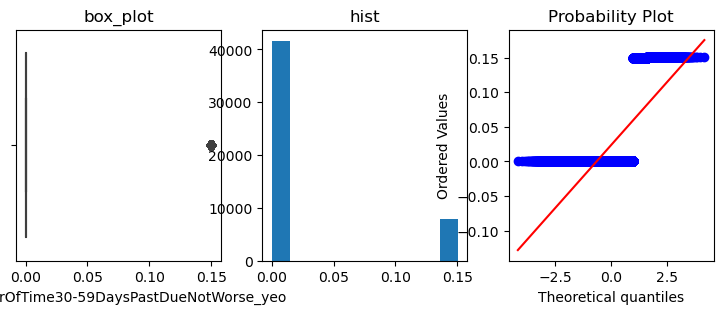

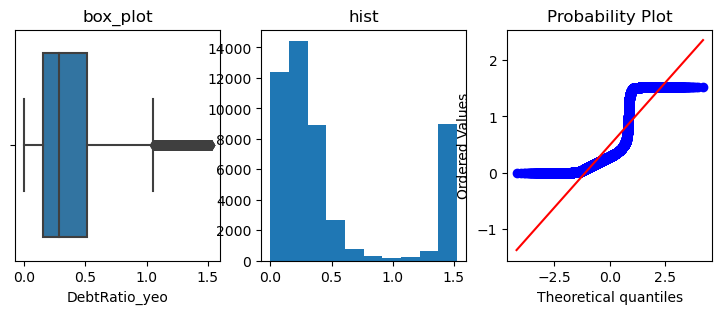

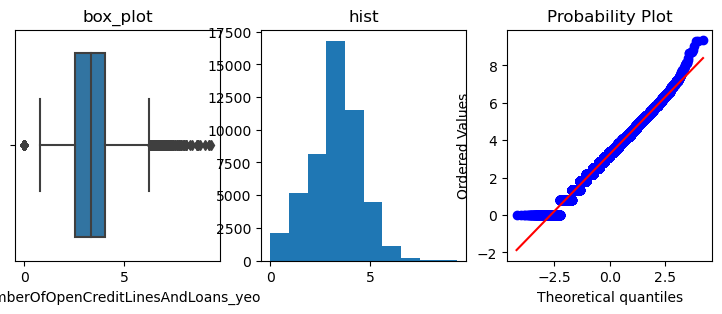

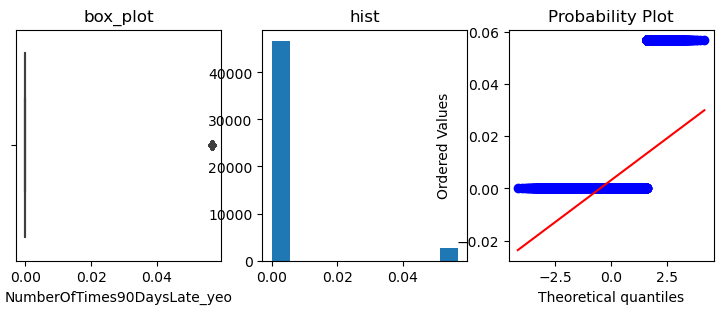

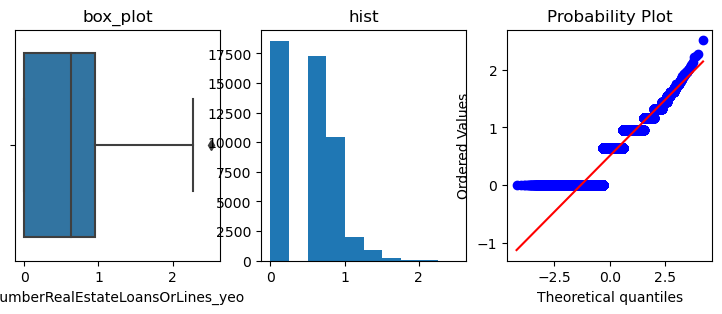

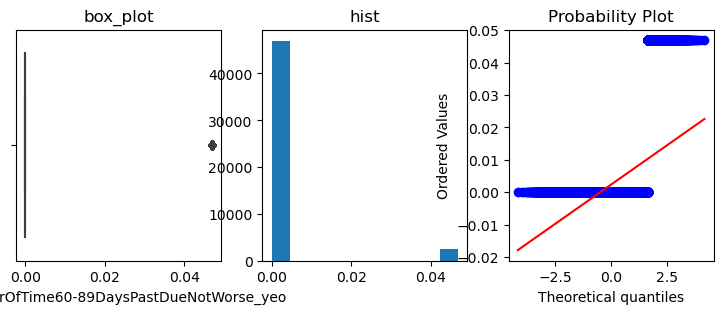

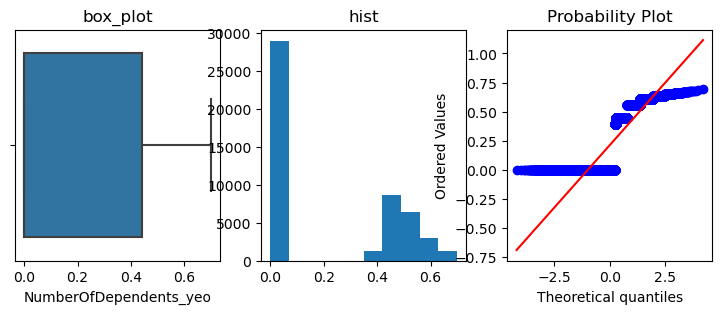

In [100]:
for i in testing_data_num.columns:
    testing_data_num[i+'_yeo'] , alpa = stats.yeojohnson(testing_data_num[i])
    vt(testing_data_num , i)
    

In [101]:
testing_data_num.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'MonthlyIncome', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'NPA Status_yeo',
       'RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo',
       'MonthlyIncome_yeo', 'NumberOfTime30-59DaysPastDueNotWorse_yeo',
       'DebtRatio_yeo', 'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberOfTimes90DaysLate_yeo', 'NumberRealEstateLoansOrLines_yeo',
       'NumberOfTime60-89DaysPastDueNotWorse_yeo', 'NumberOfDependents_yeo'],
      dtype='object')

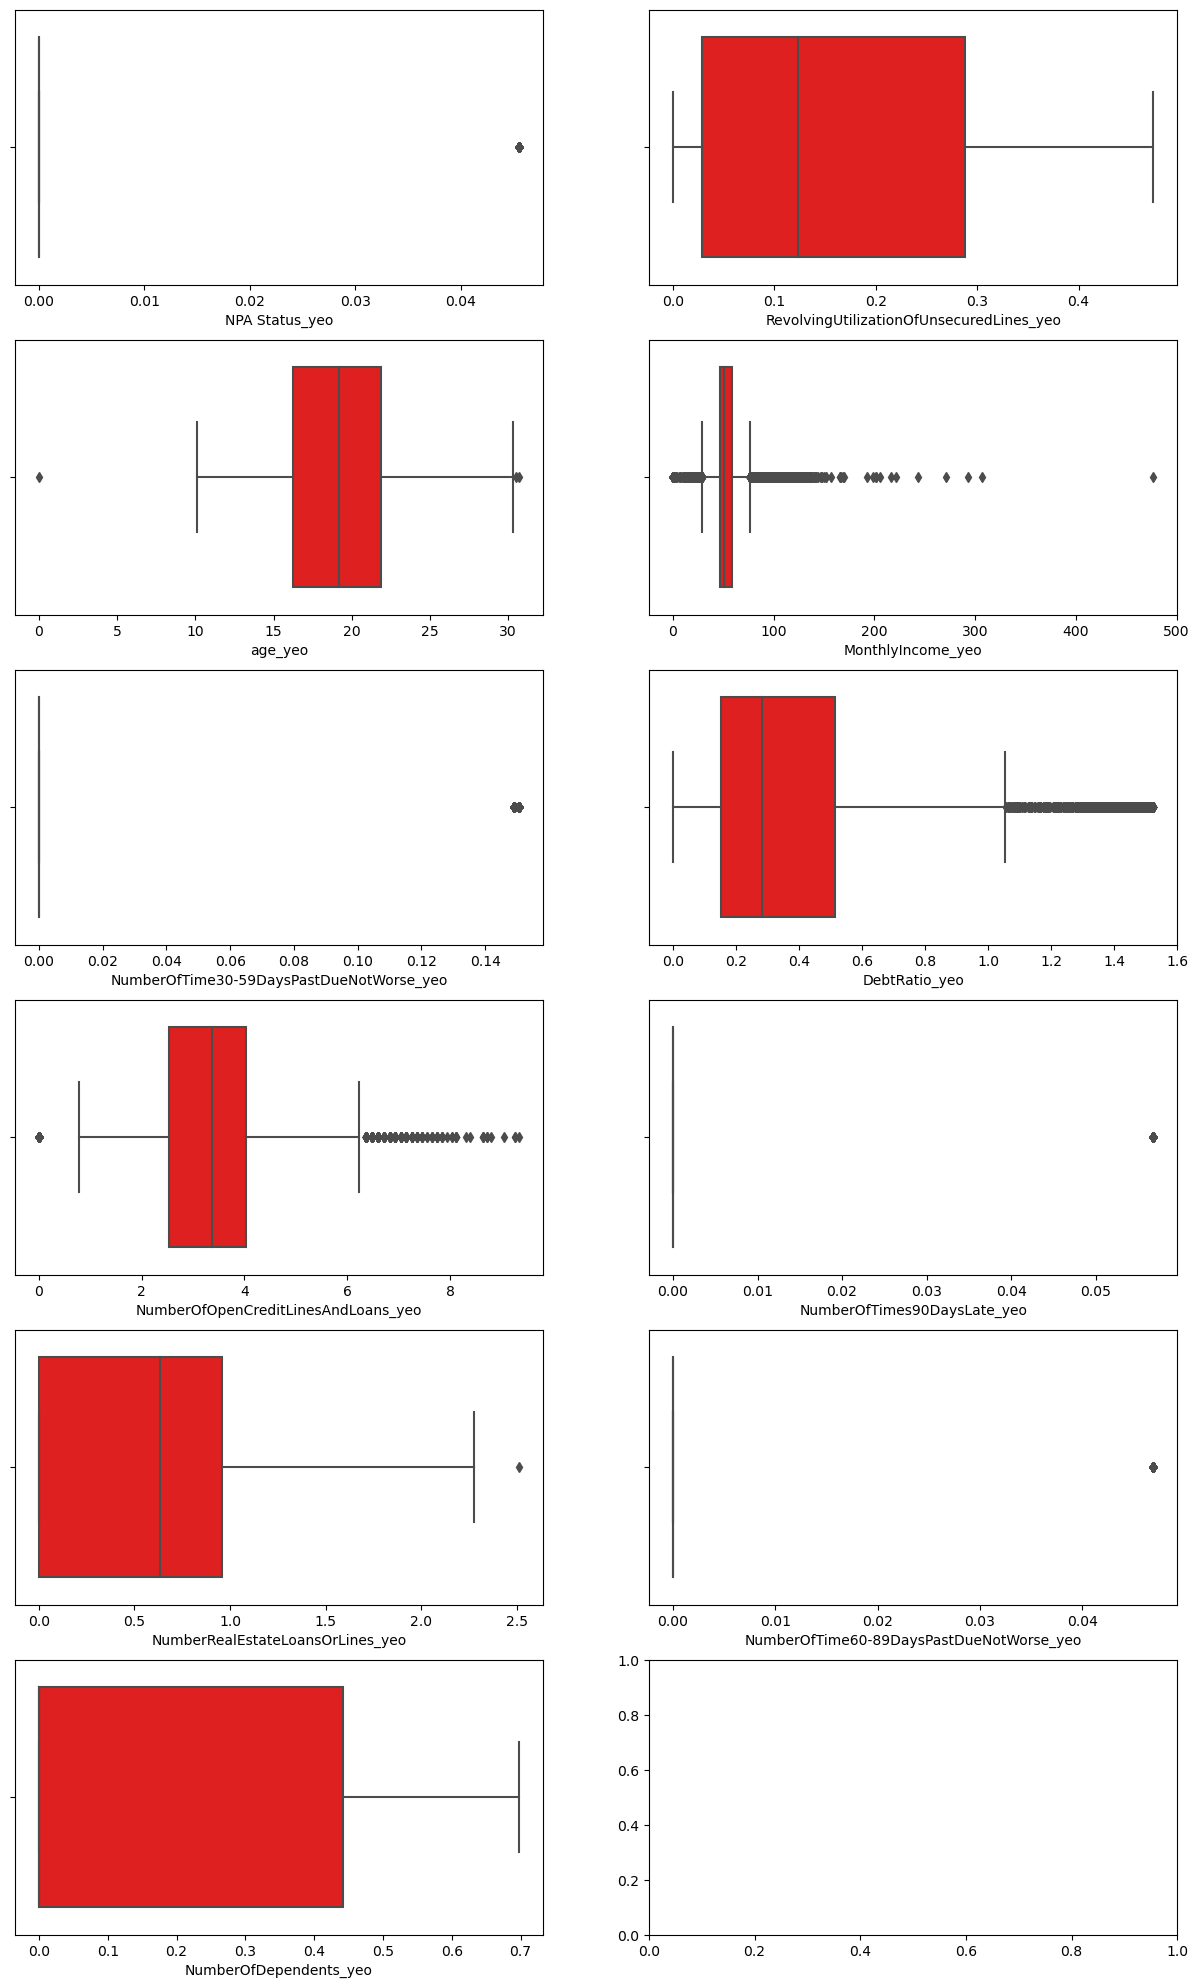

In [102]:
## After Yeojohnson lets see how test data numerical features looks like

f = ['NPA Status_yeo',
       'RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo',
       'MonthlyIncome_yeo', 'NumberOfTime30-59DaysPastDueNotWorse_yeo',
       'DebtRatio_yeo', 'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberOfTimes90DaysLate_yeo', 'NumberRealEstateLoansOrLines_yeo',
       'NumberOfTime60-89DaysPastDueNotWorse_yeo', 'NumberOfDependents_yeo']

fig , ax = plt.subplots(6,2, figsize = (15,25))

for i , subplot in zip(f, ax.flatten()):
    sns.boxplot(x = testing_data_num[i] , ax = subplot , color = 'r')

In [103]:
testing_data_num.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'MonthlyIncome', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'NPA Status_yeo',
       'RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo',
       'MonthlyIncome_yeo', 'NumberOfTime30-59DaysPastDueNotWorse_yeo',
       'DebtRatio_yeo', 'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberOfTimes90DaysLate_yeo', 'NumberRealEstateLoansOrLines_yeo',
       'NumberOfTime60-89DaysPastDueNotWorse_yeo', 'NumberOfDependents_yeo'],
      dtype='object')

In [104]:
data['NumberOfTime60-89DaysPastDueNotWorse']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
149995    0.0
149996    0.0
149997    0.0
149998    0.0
149999    0.0
Name: NumberOfTime60-89DaysPastDueNotWorse, Length: 150000, dtype: float64

In [105]:
testing_data_num = testing_data_num.drop(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'MonthlyIncome', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents','NPA Status_yeo','NumberOfTime30-59DaysPastDueNotWorse_yeo','NumberOfTimes90DaysLate_yeo','NumberOfTime60-89DaysPastDueNotWorse_yeo'],axis = 1)

In [106]:
testing_data_num.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo',
       'MonthlyIncome_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberRealEstateLoansOrLines_yeo', 'NumberOfDependents_yeo'],
      dtype='object')

In [107]:
testing_data_num.shape

(49500, 7)

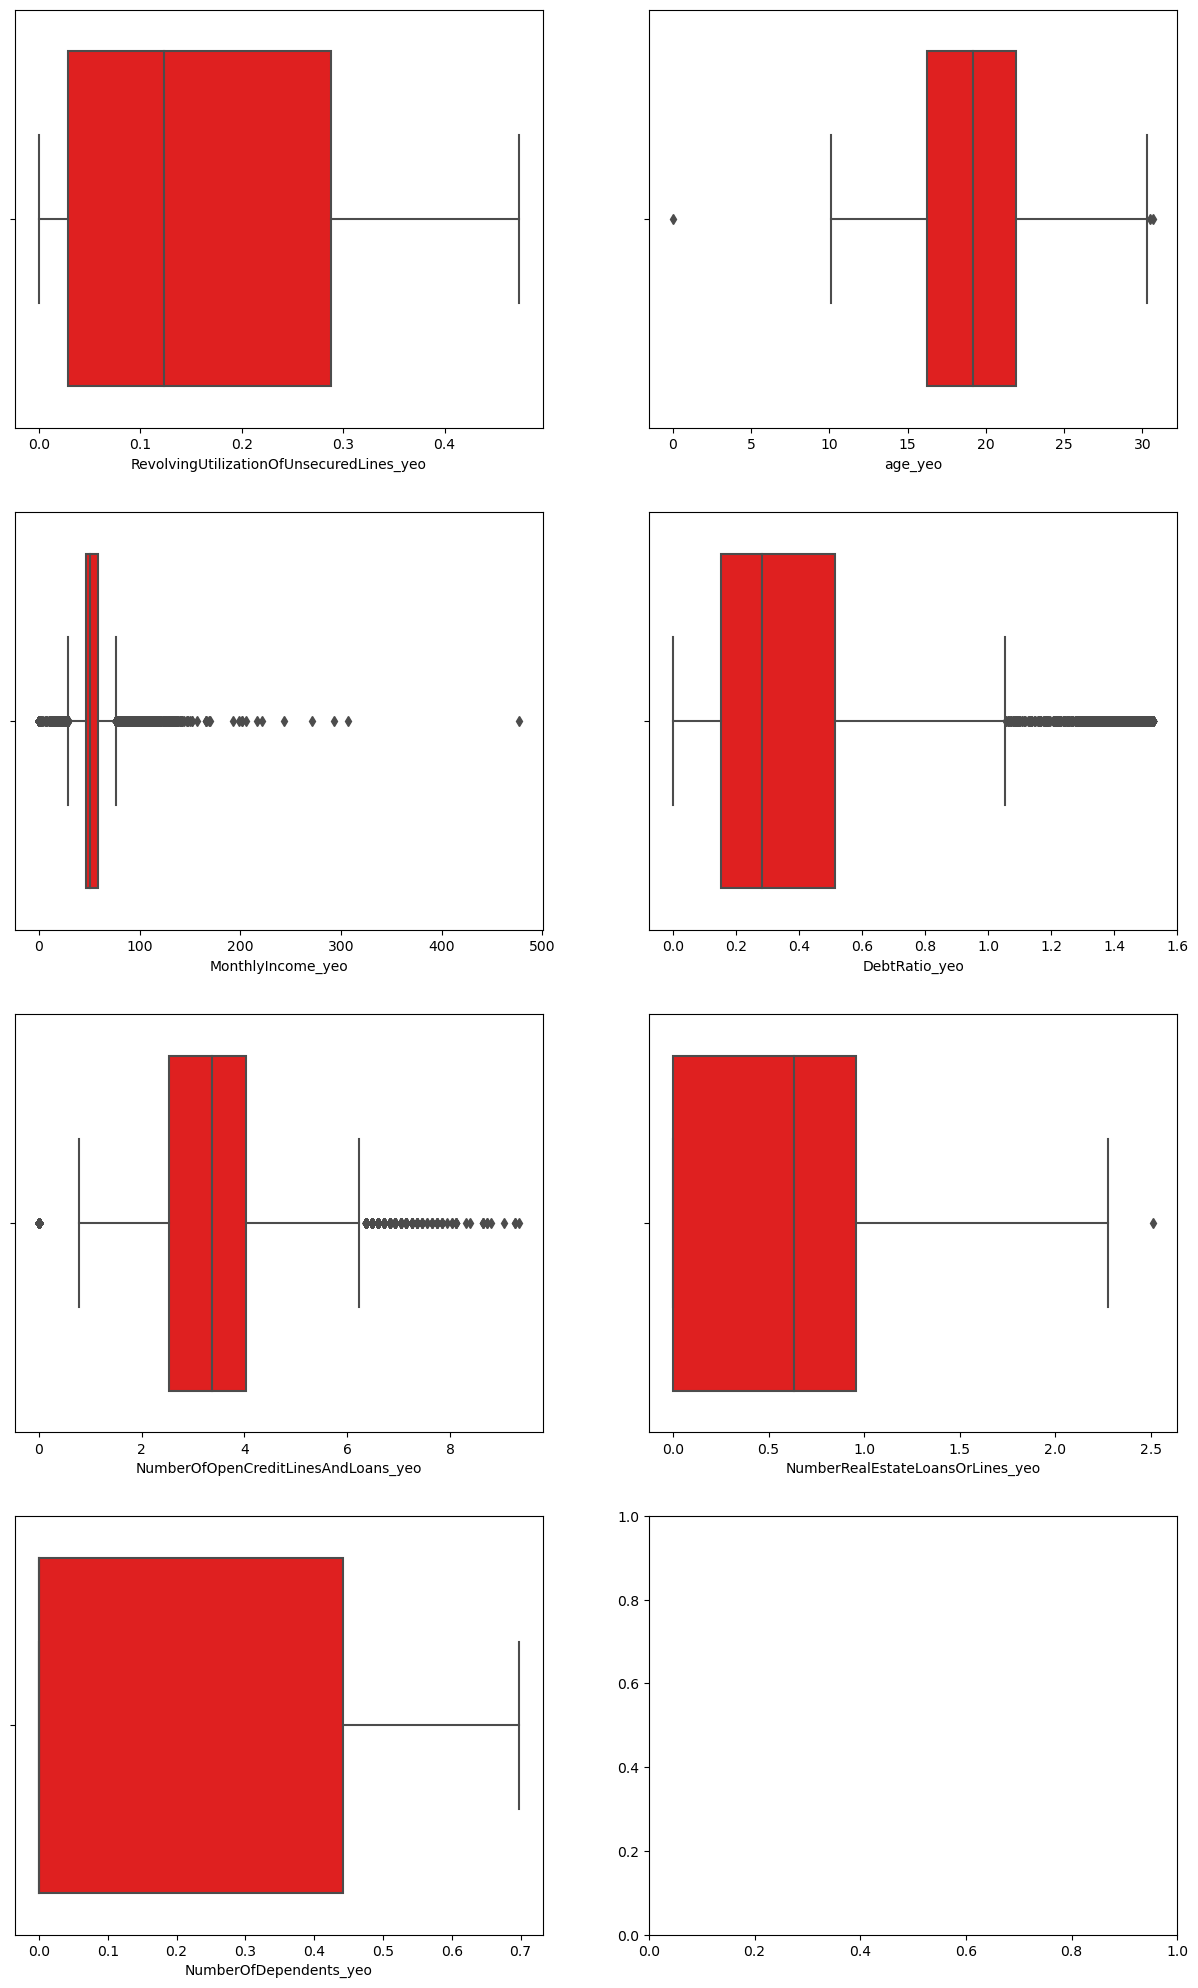

In [108]:
### Fianlly everything done on test_data 

f = testing_data_num.columns

fig , ax = plt.subplots(4,2, figsize = (15,25))

for i , subplot in zip(f, ax.flatten()):
    sns.boxplot(x = testing_data_num[i] , ax = subplot , color = 'r')

## Since training and test dataset outliers are cleared almost 80 % I am tryin to slove it even more:

In [109]:
training_data_numerical.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberRealEstateLoansOrLines_yeo', 'MonthlyIncome_mode_yeo',
       'NumberOfDependents_median_yeo'],
      dtype='object')

<Axes: xlabel='age_yeo'>

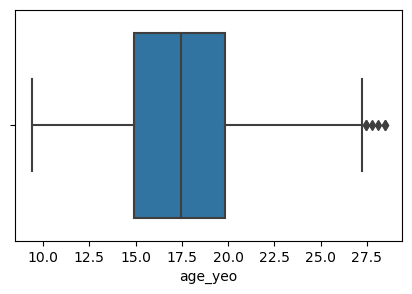

In [110]:
plt.figure(figsize=(5,3))
sns.boxplot(x = training_data_numerical['age_yeo'])

In [111]:
# Lets work on Training data : lets try it with one feature:
# 5th and 95th are not working poperlly lets use IQR with 1.5 concept:

def out(training_data_numerical , var):
    
    iqr = training_data_numerical[var].quantile(0.75) - training_data_numerical[var].quantile(0.25)
   
    lower = training_data_numerical[var].quantile(0.25) - (1.5 * iqr)
    upper = training_data_numerical[var].quantile(0.75) + (1.5 * iqr)
    
    return lower , upper

In [112]:
lower , upper = out(training_data_numerical , 'age_yeo')

In [113]:
upper

27.28624018175654

In [114]:
lower

7.459560126937029

In [115]:
training_data['h'] = np.where(training_data_numerical['age_yeo'] > upper , upper,
                             np.where(training_data_numerical['age_yeo'] < lower , lower , training_data_numerical['age_yeo']))


<Axes: xlabel='h'>

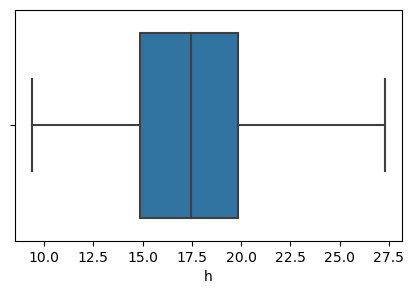

In [116]:
plt.figure(figsize=(5,3))
sns.boxplot(x = training_data['h'])

In [117]:
# Lets work on Training data : lets try it with one feature:
# 5th and 95th are not working poperlly lets use IQR with 1.5 concept:

def out(training_data_numerical , var):
    
    iqr = training_data_numerical[var].quantile(0.75) - training_data_numerical[var].quantile(0.25)
   
    lower = training_data_numerical[var].quantile(0.25) - (1.5 * iqr)
    upper = training_data_numerical[var].quantile(0.75) + (1.5 * iqr)
    
    return lower , upper

In [118]:
for i in training_data_numerical.columns:
    lower , upper = out(training_data_numerical , i)
    training_data_numerical[i+'_h'] = np.where(training_data_numerical[i] > upper , upper,
                                               np.where(training_data_numerical[i] < lower , lower , training_data_numerical[i]))

    

In [119]:
training_data_numerical.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberRealEstateLoansOrLines_yeo', 'MonthlyIncome_mode_yeo',
       'NumberOfDependents_median_yeo',
       'RevolvingUtilizationOfUnsecuredLines_yeo_h', 'age_yeo_h',
       'DebtRatio_yeo_h', 'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'MonthlyIncome_mode_yeo_h',
       'NumberOfDependents_median_yeo_h'],
      dtype='object')

<Axes: xlabel='DebtRatio_yeo_h'>

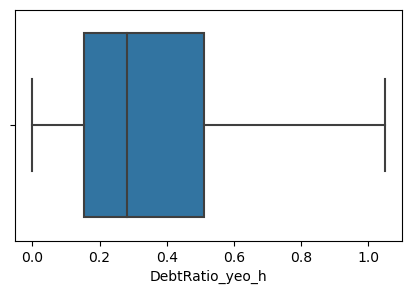

In [120]:
plt.figure(figsize=(5,3))
sns.boxplot(x = training_data_numerical['DebtRatio_yeo_h'])

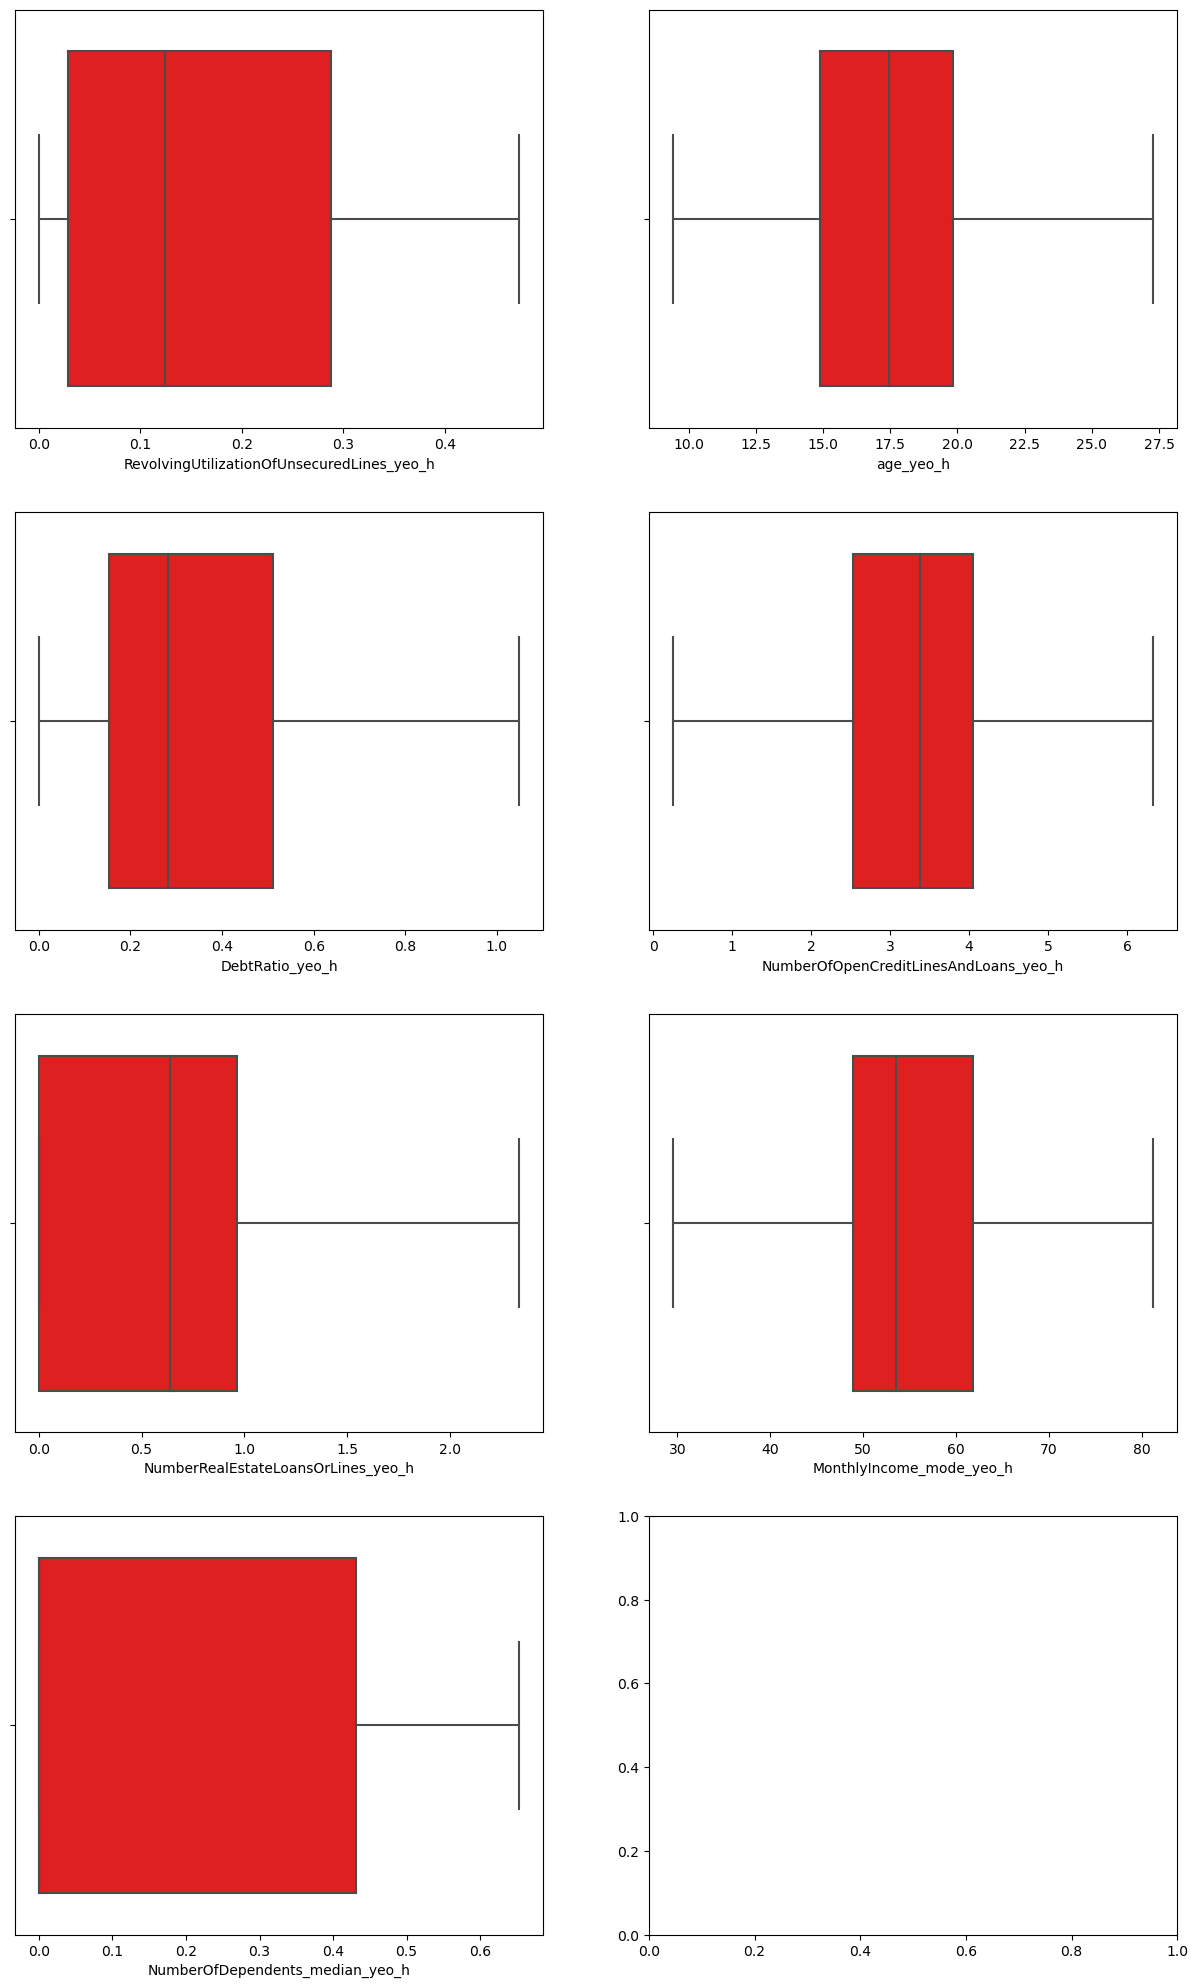

In [121]:
f = ['RevolvingUtilizationOfUnsecuredLines_yeo_h', 'age_yeo_h',
       'DebtRatio_yeo_h', 'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'MonthlyIncome_mode_yeo_h',
       'NumberOfDependents_median_yeo_h']

fig , ax = plt.subplots(4,2, figsize = (15,25))

for i , subplot in zip(f, ax.flatten()):
    sns.boxplot(x = training_data_numerical[i] , ax = subplot , color = 'r')

In [122]:
training_data_numerical.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberRealEstateLoansOrLines_yeo', 'MonthlyIncome_mode_yeo',
       'NumberOfDependents_median_yeo',
       'RevolvingUtilizationOfUnsecuredLines_yeo_h', 'age_yeo_h',
       'DebtRatio_yeo_h', 'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'MonthlyIncome_mode_yeo_h',
       'NumberOfDependents_median_yeo_h'],
      dtype='object')

In [123]:
training_data_numerical = training_data_numerical.drop(['RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberRealEstateLoansOrLines_yeo', 'MonthlyIncome_mode_yeo',
       'NumberOfDependents_median_yeo'],axis = 1)

In [124]:
training_data_numerical.shape

(100500, 7)

In [125]:
### Same thing I need to use for Test:

testing_data_num.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo',
       'MonthlyIncome_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberRealEstateLoansOrLines_yeo', 'NumberOfDependents_yeo'],
      dtype='object')

In [126]:
def out(testing_data_num , var):
    
    iqr = testing_data_num[var].quantile(0.75) - testing_data_num[var].quantile(0.25)
   
    lower = testing_data_num[var].quantile(0.25) - (1.5 * iqr)
    upper = testing_data_num[var].quantile(0.75) + (1.5 * iqr)
    
    return lower , upper

In [127]:
for i in testing_data_num.columns:
    lower , upper = out(testing_data_num , i)
    testing_data_num[i+'_h'] = np.where(testing_data_num[i] > upper , upper,
                                               np.where(testing_data_num[i] < lower , lower , testing_data_num[i]))

    

In [128]:
testing_data_num.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo',
       'MonthlyIncome_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberRealEstateLoansOrLines_yeo', 'NumberOfDependents_yeo',
       'RevolvingUtilizationOfUnsecuredLines_yeo_h', 'age_yeo_h',
       'MonthlyIncome_yeo_h', 'DebtRatio_yeo_h',
       'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'NumberOfDependents_yeo_h'],
      dtype='object')

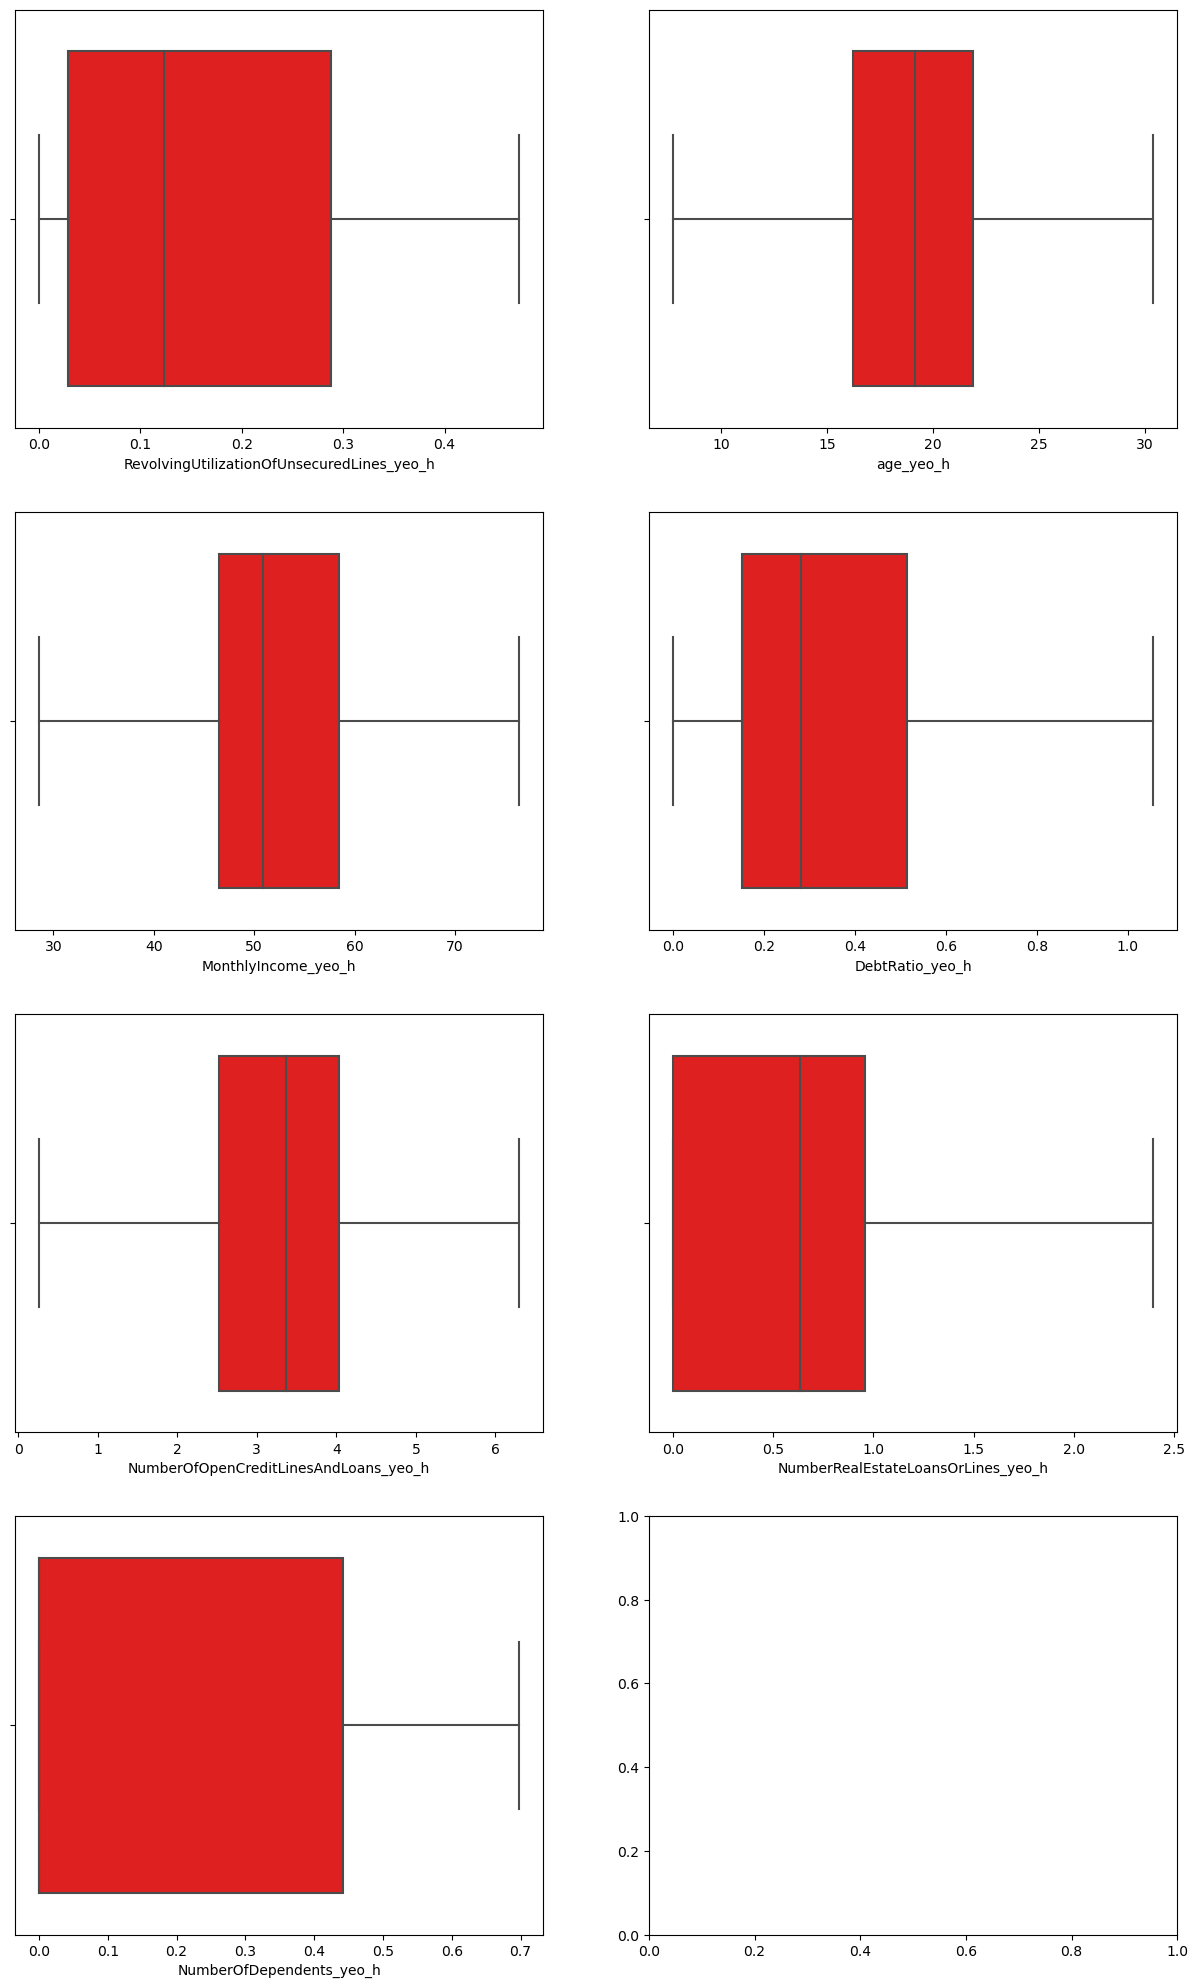

In [129]:
f = ['RevolvingUtilizationOfUnsecuredLines_yeo_h', 'age_yeo_h',
       'MonthlyIncome_yeo_h', 'DebtRatio_yeo_h',
       'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'NumberOfDependents_yeo_h']

fig , ax = plt.subplots(4,2, figsize = (15,25))

for i , subplot in zip(f, ax.flatten()):
    sns.boxplot(x = testing_data_num[i] , ax = subplot , color = 'r')

In [130]:
testing_data_num.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo',
       'MonthlyIncome_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberRealEstateLoansOrLines_yeo', 'NumberOfDependents_yeo',
       'RevolvingUtilizationOfUnsecuredLines_yeo_h', 'age_yeo_h',
       'MonthlyIncome_yeo_h', 'DebtRatio_yeo_h',
       'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'NumberOfDependents_yeo_h'],
      dtype='object')

In [131]:
testing_data_num = testing_data_num.drop(['RevolvingUtilizationOfUnsecuredLines_yeo', 'age_yeo',
       'MonthlyIncome_yeo', 'DebtRatio_yeo',
       'NumberOfOpenCreditLinesAndLoans_yeo',
       'NumberRealEstateLoansOrLines_yeo', 'NumberOfDependents_yeo'],axis = 1)

In [132]:
## Now its time for checkig numnerical stuff in both train and test 

training_data_numerical.shape

(100500, 7)

In [133]:
testing_data_num.shape

(49500, 7)

In [134]:
training_data_numerical.head()

,RevolvingUtilizationOfUnsecuredLines_yeo_h,age_yeo_h,DebtRatio_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,MonthlyIncome_mode_yeo_h,NumberOfDependents_median_yeo_h
87935,0.350057,19.218351,1.048779,2.531923,-0.000000,53.536898,-0.0
3892,0.363958,13.121298,0.056204,1.352347,-0.000000,50.744568,-0.0
41404,0.363958,10.629580,0.136334,1.352347,-0.000000,40.222715,-0.0
91124,0.210385,19.004802,0.302696,3.116456,0.961442,52.188052,-0.0
67372,0.363958,17.916249,1.048779,2.531923,0.636748,53.536898,-0.0


In [135]:
testing_data_num.head()

,RevolvingUtilizationOfUnsecuredLines_yeo_h,age_yeo_h,MonthlyIncome_yeo_h,DebtRatio_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,NumberOfDependents_yeo_h
59770,0.364014,13.018911,50.882977,1.055707,0.258870,-0.000000,-0.000000
21362,-0.000000,20.427890,59.579749,0.127614,3.599695,0.635467,-0.000000
127324,0.034588,18.124880,54.343368,0.198021,2.828028,0.958430,0.607878
140509,0.366106,16.231604,50.728039,0.143872,2.186167,-0.000000,-0.000000
144297,0.365026,18.387534,50.882977,1.055707,3.823382,0.635467,-0.000000


In [136]:
training_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,Good_Bad,MonthlyIncome_mode,NumberOfDependents_median,h
87935,0.0,0.889997,60.0,Male,Central,Rented,Non-officer,Graduate,0.0,2252.000000,5.0,0.0,0.0,0.0,Good,5000.0,0.0,19.218351
3892,0.0,1.000000,34.0,Female,South,Ownhouse,Self_Emp,Matric,0.0,0.058946,2.0,0.0,0.0,0.0,Good,4325.0,0.0,13.121298
41404,0.0,1.000000,25.0,Male,North,Ownhouse,Officer1,Post-Grad,0.0,0.153581,2.0,0.0,0.0,0.0,Good,2317.0,0.0,10.629580
91124,0.0,0.320767,59.0,Male,Central,Rented,Non-officer,Graduate,0.0,0.401757,7.0,0.0,2.0,0.0,Good,4666.0,0.0,19.004802
67372,1.0,1.000000,54.0,Male,West,Ownhouse,Self_Emp,Graduate,3.0,779.000000,5.0,2.0,1.0,2.0,Bad,5000.0,0.0,17.916249


In [137]:
### since Numerical features are completed Now Its time for categorical features:

training_data_cat = training_data.select_dtypes(include='object')

In [138]:
training_data_cat.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,Good_Bad
87935,Male,Central,Rented,Non-officer,Graduate,Good
3892,Female,South,Ownhouse,Self_Emp,Matric,Good
41404,Male,North,Ownhouse,Officer1,Post-Grad,Good
91124,Male,Central,Rented,Non-officer,Graduate,Good
67372,Male,West,Ownhouse,Self_Emp,Graduate,Bad


In [139]:
training_data_cat.isnull().sum()

Gender             0
Region             0
Rented_OwnHouse    0
Occupation         0
Education          0
Good_Bad           0
dtype: int64

In [140]:
# If we observe:

# Gender = Nominal data
# Region = Norminal data
# Rented = Odinal 
# Occupation = Odinal 
# EDucation = Odinal 
# Good_BAD = Label encoding[Nominal data]

In [141]:
import sklearn 

In [142]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , OrdinalEncoder

In [143]:
training_data_cat['Region'].unique()

array(['Central', 'South', 'North', 'West', 'East'], dtype=object)

In [144]:
training_data_cat['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [145]:
# Applying onehot encoding for gender and region features:

from sklearn.preprocessing import OneHotEncoder

s = OneHotEncoder(drop='first')

q = s.fit_transform(training_data_cat[['Gender','Region']])




In [146]:
q = q.toarray()

In [147]:
s.get_feature_names_out()

array(['Gender_Male', 'Region_East', 'Region_North', 'Region_South',
       'Region_West'], dtype=object)

In [148]:
sol = pd.DataFrame(q, index=training_data_cat.index)

In [149]:
sol

,0,1,2,3,4
87935,1.0,0.0,0.0,0.0,0.0
3892,0.0,0.0,0.0,1.0,0.0
41404,1.0,0.0,1.0,0.0,0.0
91124,1.0,0.0,0.0,0.0,0.0
67372,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
119879,1.0,0.0,0.0,0.0,1.0
103694,1.0,0.0,0.0,0.0,1.0
131932,1.0,1.0,0.0,0.0,0.0
146867,1.0,0.0,0.0,1.0,0.0


In [150]:
sol.columns = s.get_feature_names_out()

In [151]:
sol.head()

,Gender_Male,Region_East,Region_North,Region_South,Region_West
87935,1.0,0.0,0.0,0.0,0.0
3892,0.0,0.0,0.0,1.0,0.0
41404,1.0,0.0,1.0,0.0,0.0
91124,1.0,0.0,0.0,0.0,0.0
67372,1.0,0.0,0.0,0.0,1.0


In [152]:
training_data_cat = pd.concat([training_data_cat , sol],axis = 1)


In [153]:
training_data_cat.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,Good_Bad,Gender_Male,Region_East,Region_North,Region_South,Region_West
87935,Male,Central,Rented,Non-officer,Graduate,Good,1.0,0.0,0.0,0.0,0.0
3892,Female,South,Ownhouse,Self_Emp,Matric,Good,0.0,0.0,0.0,1.0,0.0
41404,Male,North,Ownhouse,Officer1,Post-Grad,Good,1.0,0.0,1.0,0.0,0.0
91124,Male,Central,Rented,Non-officer,Graduate,Good,1.0,0.0,0.0,0.0,0.0
67372,Male,West,Ownhouse,Self_Emp,Graduate,Bad,1.0,0.0,0.0,0.0,1.0


In [154]:
training_data_cat = training_data_cat.drop(['Gender','Region'],axis = 1)

In [155]:
training_data_cat.head()

,Rented_OwnHouse,Occupation,Education,Good_Bad,Gender_Male,Region_East,Region_North,Region_South,Region_West
87935,Rented,Non-officer,Graduate,Good,1.0,0.0,0.0,0.0,0.0
3892,Ownhouse,Self_Emp,Matric,Good,0.0,0.0,0.0,1.0,0.0
41404,Ownhouse,Officer1,Post-Grad,Good,1.0,0.0,1.0,0.0,0.0
91124,Rented,Non-officer,Graduate,Good,1.0,0.0,0.0,0.0,0.0
67372,Ownhouse,Self_Emp,Graduate,Bad,1.0,0.0,0.0,0.0,1.0


## same logic give it for test data: 

In [156]:
testing_data_cat = testing_data.select_dtypes(include = 'object')
testing_data_cat.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,Good_Bad
59770,Male,Central,Rented,Self_Emp,Professional,Good
21362,Female,North,Rented,Officer3,Post-Grad,Good
127324,Female,East,Rented,Officer1,Post-Grad,Good
140509,Male,West,Rented,Non-officer,Professional,Good
144297,Male,West,Rented,Officer2,Professional,Good


In [157]:
# Using s which is already fitted for gender and region columns:

q = s.transform(testing_data_cat[['Gender','Region']])
q = q.toarray()
sol = pd.DataFrame(q, index=testing_data_cat.index)
sol.columns = s.get_feature_names_out()
testing_data_cat = pd.concat([testing_data_cat , sol],axis = 1)
testing_data_cat = testing_data_cat.drop(['Gender','Region'],axis = 1)
testing_data_cat.head()

,Rented_OwnHouse,Occupation,Education,Good_Bad,Gender_Male,Region_East,Region_North,Region_South,Region_West
59770,Rented,Self_Emp,Professional,Good,1.0,0.0,0.0,0.0,0.0
21362,Rented,Officer3,Post-Grad,Good,0.0,0.0,1.0,0.0,0.0
127324,Rented,Officer1,Post-Grad,Good,0.0,1.0,0.0,0.0,0.0
140509,Rented,Non-officer,Professional,Good,1.0,0.0,0.0,0.0,1.0
144297,Rented,Officer2,Professional,Good,1.0,0.0,0.0,0.0,1.0


- One hot encoding for gender and region features completed:

- Now handle odinal features in train and test data:

In [158]:
training_data_cat.head()

,Rented_OwnHouse,Occupation,Education,Good_Bad,Gender_Male,Region_East,Region_North,Region_South,Region_West
87935,Rented,Non-officer,Graduate,Good,1.0,0.0,0.0,0.0,0.0
3892,Ownhouse,Self_Emp,Matric,Good,0.0,0.0,0.0,1.0,0.0
41404,Ownhouse,Officer1,Post-Grad,Good,1.0,0.0,1.0,0.0,0.0
91124,Rented,Non-officer,Graduate,Good,1.0,0.0,0.0,0.0,0.0
67372,Ownhouse,Self_Emp,Graduate,Bad,1.0,0.0,0.0,0.0,1.0


In [159]:
training_data_cat.isnull().sum()

Rented_OwnHouse    0
Occupation         0
Education          0
Good_Bad           0
Gender_Male        0
Region_East        0
Region_North       0
Region_South       0
Region_West        0
dtype: int64

In [160]:
from sklearn.preprocessing import OrdinalEncoder

p = OrdinalEncoder()

In [161]:
q1 = p.fit_transform(training_data_cat[['Rented_OwnHouse' , 'Occupation' , 'Education']])

q1

array([[1., 0., 0.],
       [0., 4., 1.],
       [0., 1., 3.],
       ...,
       [1., 1., 4.],
       [1., 4., 4.],
       [1., 4., 3.]])

In [162]:
d = pd.DataFrame(q1 , index = training_data_cat.index)

d.columns = ['Rented_re' , 'Occupation_re' , 'Education_re']

In [163]:
training_data_cat.head()

,Rented_OwnHouse,Occupation,Education,Good_Bad,Gender_Male,Region_East,Region_North,Region_South,Region_West
87935,Rented,Non-officer,Graduate,Good,1.0,0.0,0.0,0.0,0.0
3892,Ownhouse,Self_Emp,Matric,Good,0.0,0.0,0.0,1.0,0.0
41404,Ownhouse,Officer1,Post-Grad,Good,1.0,0.0,1.0,0.0,0.0
91124,Rented,Non-officer,Graduate,Good,1.0,0.0,0.0,0.0,0.0
67372,Ownhouse,Self_Emp,Graduate,Bad,1.0,0.0,0.0,0.0,1.0


In [164]:
d

,Rented_re,Occupation_re,Education_re
87935,1.0,0.0,0.0
3892,0.0,4.0,1.0
41404,0.0,1.0,3.0
91124,1.0,0.0,0.0
67372,0.0,4.0,0.0
...,...,...,...
119879,0.0,4.0,0.0
103694,0.0,4.0,2.0
131932,1.0,1.0,4.0
146867,1.0,4.0,4.0


In [165]:
training_data_cat = pd.concat([training_data_cat , d] , axis = 1)
training_data_cat.head()

,Rented_OwnHouse,Occupation,Education,Good_Bad,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_re,Occupation_re,Education_re
87935,Rented,Non-officer,Graduate,Good,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3892,Ownhouse,Self_Emp,Matric,Good,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0
41404,Ownhouse,Officer1,Post-Grad,Good,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
91124,Rented,Non-officer,Graduate,Good,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
67372,Ownhouse,Self_Emp,Graduate,Bad,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0


In [166]:
training_data_cat = training_data_cat.drop(['Rented_OwnHouse','Occupation','Education'],axis = 1)
training_data_cat.head()

,Good_Bad,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_re,Occupation_re,Education_re
87935,Good,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3892,Good,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0
41404,Good,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
91124,Good,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
67372,Bad,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0


- Same concept You need to apply for test data odinal features also

In [167]:
testing_data_cat.head()

,Rented_OwnHouse,Occupation,Education,Good_Bad,Gender_Male,Region_East,Region_North,Region_South,Region_West
59770,Rented,Self_Emp,Professional,Good,1.0,0.0,0.0,0.0,0.0
21362,Rented,Officer3,Post-Grad,Good,0.0,0.0,1.0,0.0,0.0
127324,Rented,Officer1,Post-Grad,Good,0.0,1.0,0.0,0.0,0.0
140509,Rented,Non-officer,Professional,Good,1.0,0.0,0.0,0.0,1.0
144297,Rented,Officer2,Professional,Good,1.0,0.0,0.0,0.0,1.0


In [168]:
testing_data_cat.columns

Index(['Rented_OwnHouse', 'Occupation', 'Education', 'Good_Bad', 'Gender_Male',
       'Region_East', 'Region_North', 'Region_South', 'Region_West'],
      dtype='object')

In [169]:
q = p.transform(testing_data_cat[['Rented_OwnHouse', 'Occupation', 'Education']])

sol = pd.DataFrame(q, index=testing_data_cat.index)
sol.columns = ['Rented_re', 'Occupation_re', 'Education_re']
testing_data_cat = pd.concat([testing_data_cat , sol],axis = 1)
testing_data_cat = testing_data_cat.drop(['Rented_OwnHouse', 'Occupation', 'Education'],axis = 1)
testing_data_cat.head()

,Good_Bad,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_re,Occupation_re,Education_re
59770,Good,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0
21362,Good,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0
127324,Good,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0
140509,Good,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0
144297,Good,1.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0


- Focus on dependent variable: using Label Encoding:

In [170]:
from sklearn.preprocessing import LabelEncoder

p = LabelEncoder()

q = p.fit_transform(training_data_cat['Good_Bad'])

sol = pd.DataFrame(q, index=training_data_cat.index)
sol.columns = ['Good_Bad_re']

training_data_cat = pd.concat([training_data_cat , sol],axis = 1)
training_data_cat = training_data_cat.drop(['Good_Bad'],axis = 1)

training_data_cat.head()

,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_re,Occupation_re,Education_re,Good_Bad_re
87935,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3892,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1
41404,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1
91124,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
67372,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0


- `Same Operation do it on test data `

In [171]:
q = p.transform(testing_data_cat['Good_Bad'])

sol = pd.DataFrame(q, index=testing_data_cat.index)
sol.columns = ['Good_Bad_re']
testing_data_cat = pd.concat([testing_data_cat , sol],axis = 1)
testing_data_cat = testing_data_cat.drop(['Good_Bad'],axis = 1)
testing_data_cat.head()

,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_re,Occupation_re,Education_re,Good_Bad_re
59770,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,1
21362,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,1
127324,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,1
140509,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1
144297,1.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,1


- `Now Its time to add Entire data into one variable:`

In [172]:
final_train_data = pd.concat([training_data_numerical , training_data_cat],axis = 1)

In [173]:
final_train_data.head()

,RevolvingUtilizationOfUnsecuredLines_yeo_h,age_yeo_h,DebtRatio_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,MonthlyIncome_mode_yeo_h,NumberOfDependents_median_yeo_h,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_re,Occupation_re,Education_re,Good_Bad_re
87935,0.350057,19.218351,1.048779,2.531923,-0.000000,53.536898,-0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3892,0.363958,13.121298,0.056204,1.352347,-0.000000,50.744568,-0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1
41404,0.363958,10.629580,0.136334,1.352347,-0.000000,40.222715,-0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1
91124,0.210385,19.004802,0.302696,3.116456,0.961442,52.188052,-0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
67372,0.363958,17.916249,1.048779,2.531923,0.636748,53.536898,-0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0


In [174]:
final_test_data = pd.concat([testing_data_num , testing_data_cat],axis = 1)
final_test_data.head()

,RevolvingUtilizationOfUnsecuredLines_yeo_h,age_yeo_h,MonthlyIncome_yeo_h,DebtRatio_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,NumberOfDependents_yeo_h,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_re,Occupation_re,Education_re,Good_Bad_re
59770,0.364014,13.018911,50.882977,1.055707,0.258870,-0.000000,-0.000000,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,1
21362,-0.000000,20.427890,59.579749,0.127614,3.599695,0.635467,-0.000000,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,1
127324,0.034588,18.124880,54.343368,0.198021,2.828028,0.958430,0.607878,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,1
140509,0.366106,16.231604,50.728039,0.143872,2.186167,-0.000000,-0.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1
144297,0.365026,18.387534,50.882977,1.055707,3.823382,0.635467,-0.000000,1.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,1


- Finally Feature Engineering Part Completed : 

- Its Time for Feature Selection :

In [175]:
final_train_data.shape

(100500, 16)

In [176]:
final_test_data.shape

(49500, 16)

In [177]:
## constant feature selection method:

from sklearn.feature_selection import VarianceThreshold

In [178]:
var = VarianceThreshold(threshold=0.0)
var.fit(final_train_data)
var.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [179]:
## quasi constant for feature selection :

var = VarianceThreshold(threshold=0.1)
var.fit(final_train_data)
var.get_support()

array([False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False])

In [180]:
c = final_train_data.columns[var.get_support()]
c

Index(['age_yeo_h', 'DebtRatio_yeo_h', 'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'MonthlyIncome_mode_yeo_h',
       'Gender_Male', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Rented_re', 'Occupation_re', 'Education_re'],
      dtype='object')

In [181]:
# Unwanted columns:

un = final_train_data.columns[~var.get_support()]
un

Index(['RevolvingUtilizationOfUnsecuredLines_yeo_h',
       'NumberOfDependents_median_yeo_h', 'Good_Bad_re'],
      dtype='object')

In [182]:
final_train_data = final_train_data.drop(['RevolvingUtilizationOfUnsecuredLines_yeo_h','NumberOfDependents_median_yeo_h'],axis = 1)

In [183]:
final_test_data.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yeo_h', 'age_yeo_h',
       'MonthlyIncome_yeo_h', 'DebtRatio_yeo_h',
       'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'NumberOfDependents_yeo_h',
       'Gender_Male', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Rented_re', 'Occupation_re', 'Education_re',
       'Good_Bad_re'],
      dtype='object')

In [184]:
final_test_data = final_test_data.drop(['RevolvingUtilizationOfUnsecuredLines_yeo_h','NumberOfDependents_yeo_h'],axis = 1)


In [185]:
final_train_data.shape

(100500, 14)

In [186]:
final_test_data.shape

(49500, 14)


-Lets try to use correlation and lets see any correlated Features are there :

In [187]:
final_train_data.head()

,age_yeo_h,DebtRatio_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,MonthlyIncome_mode_yeo_h,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_re,Occupation_re,Education_re,Good_Bad_re
87935,19.218351,1.048779,2.531923,-0.000000,53.536898,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3892,13.121298,0.056204,1.352347,-0.000000,50.744568,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1
41404,10.629580,0.136334,1.352347,-0.000000,40.222715,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1
91124,19.004802,0.302696,3.116456,0.961442,52.188052,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
67372,17.916249,1.048779,2.531923,0.636748,53.536898,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0


- since correlation is used only for numerical features I am using only Numerical Features :

In [188]:
final_train_data.columns

Index(['age_yeo_h', 'DebtRatio_yeo_h', 'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'MonthlyIncome_mode_yeo_h',
       'Gender_Male', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Rented_re', 'Occupation_re', 'Education_re',
       'Good_Bad_re'],
      dtype='object')

In [189]:
import seaborn as sns 

<Axes: >

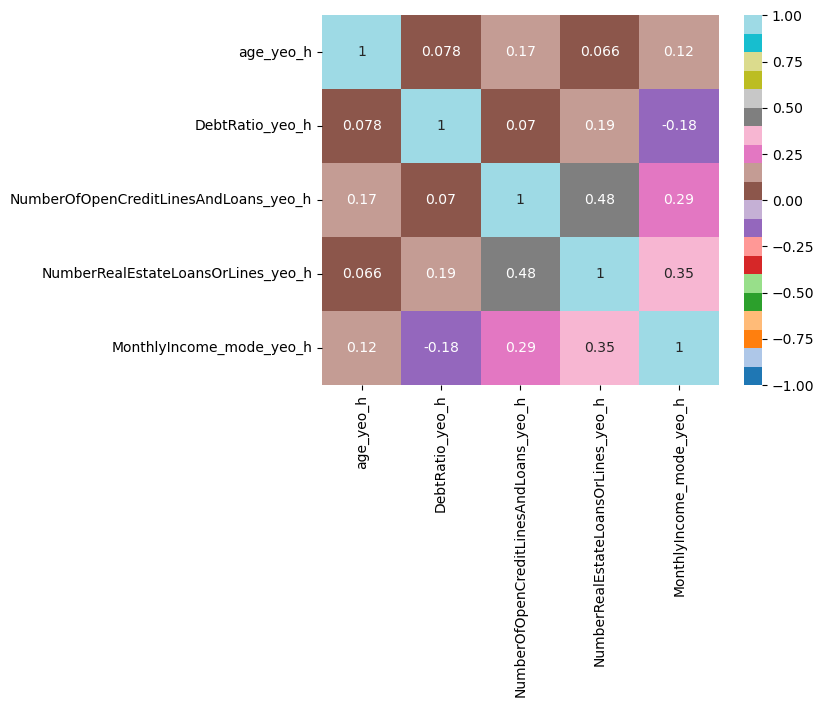

In [190]:
d = final_train_data.iloc[: , 0:5]
corr = d.corr()

sns.heatmap(data = corr , vmin = -1 , vmax = 1 , cmap = 'tab20', annot=True)


In [191]:
pip install feature-engine

Note: you may need to restart the kernel to use updated packages.


In [192]:
import feature_engine

In [193]:
from feature_engine.selection import DropCorrelatedFeatures

cor = DropCorrelatedFeatures(method='spearman' , threshold=0.85)

cor.fit(d)

DropCorrelatedFeatures(method='spearman', threshold=0.85)

In [194]:
cor.features_to_drop_

set()

- using pearson concept with dependent variable might have chance to select ones 

- Using Hypothesis testing :

In [195]:
d.columns

Index(['age_yeo_h', 'DebtRatio_yeo_h', 'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'MonthlyIncome_mode_yeo_h'],
      dtype='object')

In [196]:
from scipy.stats import pearsonr

corr = []

for i in d.columns:
    sol = pearsonr(final_train_data[i] , final_train_data['Good_Bad_re'])
    corr.append(sol)

corr = np.array(corr)

print(corr)

[[ 1.17641447e-001  1.59544573e-306]
 [-3.36392697e-003  2.86237004e-001]
 [ 4.75115377e-002  2.53938914e-051]
 [ 3.15683527e-002  1.37633284e-023]
 [ 5.52471153e-002  8.84283784e-069]]


In [197]:
p_value_num = pd.Series(corr[: , 1],index=d.columns)
p_value_num

age_yeo_h                                1.595446e-306
DebtRatio_yeo_h                           2.862370e-01
NumberOfOpenCreditLinesAndLoans_yeo_h     2.539389e-51
NumberRealEstateLoansOrLines_yeo_h        1.376333e-23
MonthlyIncome_mode_yeo_h                  8.842838e-69
dtype: float64

In [198]:
p_value_num = p_value_num.sort_values(ascending=True)
p_value_num

age_yeo_h                                1.595446e-306
MonthlyIncome_mode_yeo_h                  8.842838e-69
NumberOfOpenCreditLinesAndLoans_yeo_h     2.539389e-51
NumberRealEstateLoansOrLines_yeo_h        1.376333e-23
DebtRatio_yeo_h                           2.862370e-01
dtype: float64

<Axes: >

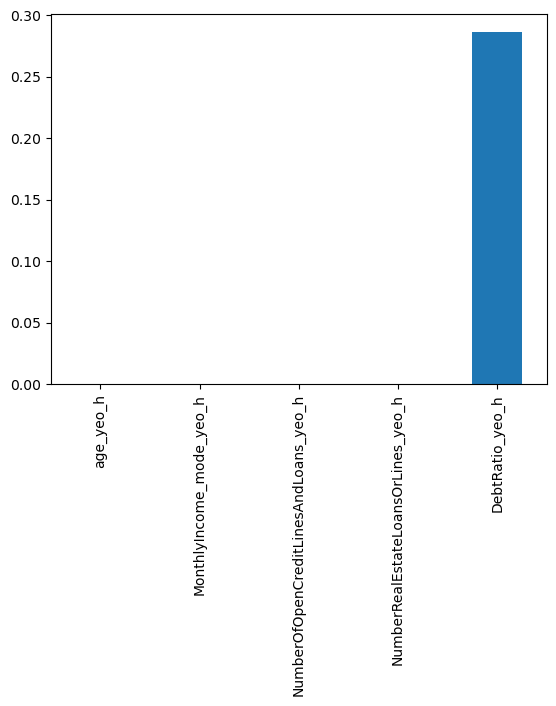

In [199]:
p_value_num.plot.bar()

In [200]:
final_train_data = final_train_data.drop(['DebtRatio_yeo_h'],axis = 1)
final_test_data = final_test_data.drop(['DebtRatio_yeo_h'] , axis = 1)

In [201]:
final_train_data.head()

,age_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,MonthlyIncome_mode_yeo_h,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_re,Occupation_re,Education_re,Good_Bad_re
87935,19.218351,2.531923,-0.000000,53.536898,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3892,13.121298,1.352347,-0.000000,50.744568,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1
41404,10.629580,1.352347,-0.000000,40.222715,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1
91124,19.004802,3.116456,0.961442,52.188052,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
67372,17.916249,2.531923,0.636748,53.536898,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0


- For Numerical columns we selected Best Ones Now For Category columns I am Using chi2 test with dependent variable

In [202]:
final_train_data.columns

Index(['age_yeo_h', 'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'MonthlyIncome_mode_yeo_h',
       'Gender_Male', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Rented_re', 'Occupation_re', 'Education_re',
       'Good_Bad_re'],
      dtype='object')

In [203]:
d = final_train_data.iloc[: , 4:12]
d

,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_re,Occupation_re,Education_re
87935,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3892,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0
41404,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
91124,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
67372,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...
119879,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0
103694,1.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0
131932,1.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0
146867,1.0,0.0,0.0,1.0,0.0,1.0,4.0,4.0


In [204]:
final_train_data.head()

,age_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,MonthlyIncome_mode_yeo_h,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_re,Occupation_re,Education_re,Good_Bad_re
87935,19.218351,2.531923,-0.000000,53.536898,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3892,13.121298,1.352347,-0.000000,50.744568,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1
41404,10.629580,1.352347,-0.000000,40.222715,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1
91124,19.004802,3.116456,0.961442,52.188052,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
67372,17.916249,2.531923,0.636748,53.536898,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0


In [205]:
final_test_data.head()

,age_yeo_h,MonthlyIncome_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_re,Occupation_re,Education_re,Good_Bad_re
59770,13.018911,50.882977,0.258870,-0.000000,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,1
21362,20.427890,59.579749,3.599695,0.635467,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,1
127324,18.124880,54.343368,2.828028,0.958430,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,1
140509,16.231604,50.728039,2.186167,-0.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1
144297,18.387534,50.882977,3.823382,0.635467,1.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,1


- Now its time for model development: but we need to check whether data is balance or not :

- Scaling process

In [206]:
from sklearn.model_selection import train_test_split

In [207]:
final_train_data.columns

Index(['age_yeo_h', 'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'MonthlyIncome_mode_yeo_h',
       'Gender_Male', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Rented_re', 'Occupation_re', 'Education_re',
       'Good_Bad_re'],
      dtype='object')

In [208]:
final_test_data.columns

Index(['age_yeo_h', 'MonthlyIncome_yeo_h',
       'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'Gender_Male', 'Region_East',
       'Region_North', 'Region_South', 'Region_West', 'Rented_re',
       'Occupation_re', 'Education_re', 'Good_Bad_re'],
      dtype='object')

In [209]:
## checking whether data is balacned or not:

print(sum(final_train_data['Good_Bad_re'] == 1))
print(sum(final_train_data['Good_Bad_re'] == 0))

93727
6773


In [210]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [211]:
import imblearn

In [212]:
## checking whether the data is balanced or not 

print('The value 1 in dependent variable = ',sum(final_train_data['Good_Bad_re'] == 1))
print('The value 1 in dependent variable = ',sum(final_train_data['Good_Bad_re'] == 0))

#for maintain data balacned we are using upsampling 

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)

X_train , y_train = sm.fit_resample(final_train_data.iloc[: , :-1] , final_train_data.iloc[: , -1])

print('--------------------------------------------------------------------------')

print('The value 1 in dependent variable = ',sum(y_train == 1))
print('The value 1 in dependent variable = ',sum(y_train == 0))

The value 1 in dependent variable =  93727
The value 1 in dependent variable =  6773
--------------------------------------------------------------------------
The value 1 in dependent variable =  93727
The value 1 in dependent variable =  93727


In [213]:
X_train.head()

,age_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,MonthlyIncome_mode_yeo_h,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_re,Occupation_re,Education_re
0,19.218351,2.531923,-0.000000,53.536898,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,13.121298,1.352347,-0.000000,50.744568,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0
2,10.629580,1.352347,-0.000000,40.222715,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
3,19.004802,3.116456,0.961442,52.188052,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,17.916249,2.531923,0.636748,53.536898,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0


In [214]:
y_train.head()

0    1
1    1
2    1
3    1
4    0
Name: Good_Bad_re, dtype: int32

In [215]:
X_train.columns

Index(['age_yeo_h', 'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'MonthlyIncome_mode_yeo_h',
       'Gender_Male', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Rented_re', 'Occupation_re', 'Education_re'],
      dtype='object')

In [216]:
final_test_data.columns

Index(['age_yeo_h', 'MonthlyIncome_yeo_h',
       'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'Gender_Male', 'Region_East',
       'Region_North', 'Region_South', 'Region_West', 'Rented_re',
       'Occupation_re', 'Education_re', 'Good_Bad_re'],
      dtype='object')

In [217]:
final_test_data['MonthlyIncome_mode_yeo_h'] = final_test_data['MonthlyIncome_yeo_h']

In [218]:
final_test_data['MonthlyIncome_mode_yeo_h']

59770     50.882977
21362     59.579749
127324    54.343368
140509    50.728039
144297    50.882977
            ...    
134069    75.589074
87920     52.668453
120536    72.478266
141500    67.529587
61721     50.882977
Name: MonthlyIncome_mode_yeo_h, Length: 49500, dtype: float64

In [219]:
final_test_data.head()

,age_yeo_h,MonthlyIncome_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_re,Occupation_re,Education_re,Good_Bad_re,MonthlyIncome_mode_yeo_h
59770,13.018911,50.882977,0.258870,-0.000000,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,1,50.882977
21362,20.427890,59.579749,3.599695,0.635467,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,1,59.579749
127324,18.124880,54.343368,2.828028,0.958430,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,1,54.343368
140509,16.231604,50.728039,2.186167,-0.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1,50.728039
144297,18.387534,50.882977,3.823382,0.635467,1.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,1,50.882977


In [220]:
final_test_data = final_test_data.drop(['MonthlyIncome_yeo_h'],axis = 1)


In [221]:
final_test_data.head()

,age_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_re,Occupation_re,Education_re,Good_Bad_re,MonthlyIncome_mode_yeo_h
59770,13.018911,0.258870,-0.000000,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,1,50.882977
21362,20.427890,3.599695,0.635467,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,1,59.579749
127324,18.124880,2.828028,0.958430,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,1,54.343368
140509,16.231604,2.186167,-0.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1,50.728039
144297,18.387534,3.823382,0.635467,1.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,1,50.882977


In [222]:
X_train.columns

Index(['age_yeo_h', 'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'MonthlyIncome_mode_yeo_h',
       'Gender_Male', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Rented_re', 'Occupation_re', 'Education_re'],
      dtype='object')

In [223]:
final_test_data = final_test_data[['age_yeo_h', 'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'MonthlyIncome_mode_yeo_h',
       'Gender_Male', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Rented_re', 'Occupation_re', 'Education_re']]

In [224]:
final_test_data.columns

Index(['age_yeo_h', 'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'MonthlyIncome_mode_yeo_h',
       'Gender_Male', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Rented_re', 'Occupation_re', 'Education_re'],
      dtype='object')

In [225]:
X_test = final_test_data.iloc[: , :]
y_test = testing_data_cat['Good_Bad_re']

In [226]:
X_test.head()

,age_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,MonthlyIncome_mode_yeo_h,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_re,Occupation_re,Education_re
59770,13.018911,0.258870,-0.000000,50.882977,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0
21362,20.427890,3.599695,0.635467,59.579749,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0
127324,18.124880,2.828028,0.958430,54.343368,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0
140509,16.231604,2.186167,-0.000000,50.728039,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0
144297,18.387534,3.823382,0.635467,50.882977,1.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0


In [227]:
y_test.head()

59770     1
21362     1
127324    1
140509    1
144297    1
Name: Good_Bad_re, dtype: int32

- Scaling the values:

In [228]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)

X_train_1 = sc.transform(X_train)
X_test_1 = sc.transform(X_test)

In [229]:
X_train_1

array([[ 0.78307362, -0.50149974, -1.14263938, ...,  1.20260213,
        -1.36611912, -1.38150612],
       [-1.09444291, -1.42803983, -1.14263938, ..., -0.90741148,
         0.98520895, -0.75240769],
       [-1.8617384 , -1.42803983, -1.14263938, ..., -0.90741148,
        -0.7782871 ,  0.50578918],
       ...,
       [-0.48270371, -0.96238158, -0.08669554, ...,  1.20260213,
        -0.7782871 , -0.75240769],
       [-1.95276625, -0.2702098 , -1.14263938, ...,  1.20260213,
         0.98520895, -1.38150612],
       [ 0.66409375, -0.84327188, -0.54328852, ...,  0.35711944,
         0.98520895, -0.75240769]])

In [230]:
X_train_1 = pd.DataFrame(X_train_1 , columns=X_train.columns)
X_test_1 = pd.DataFrame(X_test_1 , columns=X_test.columns)

In [231]:
X_train_1.head()

,age_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,MonthlyIncome_mode_yeo_h,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_re,Occupation_re,Education_re
0,0.783074,-0.501500,-1.142639,-0.032102,0.813679,-0.351688,-0.579865,-0.440909,-0.718276,1.202602,-1.366119,-1.381506
1,-1.094443,-1.428040,-1.142639,-0.276460,-1.330141,-0.351688,-0.579865,2.388623,-0.718276,-0.907411,0.985209,-0.752408
2,-1.861738,-1.428040,-1.142639,-1.197233,0.813679,-0.351688,1.809493,-0.440909,-0.718276,-0.907411,-0.778287,0.505789
3,0.717313,-0.042357,1.115845,-0.150140,0.813679,-0.351688,-0.579865,-0.440909,-0.718276,1.202602,-1.366119,-1.381506
4,0.382106,-0.501500,0.353120,-0.032102,0.813679,-0.351688,-0.579865,-0.440909,1.465388,-0.907411,0.985209,-1.381506


In [232]:
X_test_1.head()

,age_yeo_h,NumberOfOpenCreditLinesAndLoans_yeo_h,NumberRealEstateLoansOrLines_yeo_h,MonthlyIncome_mode_yeo_h,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_re,Occupation_re,Education_re
0,-1.125972,-2.286950,-1.142639,-0.264348,0.813679,-0.351688,-0.579865,-0.440909,-0.718276,1.202602,0.985209,1.134888
1,1.155537,0.337220,0.350109,0.496710,-1.330141,-0.351688,1.809493,-0.440909,-0.718276,1.202602,0.397377,0.505789
2,0.446352,-0.268913,1.108770,0.038472,-1.330141,2.964636,-0.579865,-0.440909,-0.718276,1.202602,-0.778287,0.505789
3,-0.136661,-0.773086,-1.142639,-0.277907,0.813679,-0.351688,-0.579865,-0.440909,1.465388,1.202602,-1.366119,1.134888
4,0.527233,0.512922,0.350109,-0.264348,0.813679,-0.351688,-0.579865,-0.440909,1.465388,1.202602,-0.190455,1.134888


- Lets Build the Model

In [233]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [234]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [235]:
def knn(X_train,X_test,y_train,y_test):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train , y_train)  # fitting training data
    y_train_pred = knn.predict(X_train)
    print('---Training Accuracy---')
    print('Training_accuracy : {}'.format(accuracy_score(y_train , y_train_pred)))
    y_test_pred = knn.predict(X_test)
    print('--Test Accuracy---')
    print('Test_accuracy : {}'.format(accuracy_score(y_test , y_test_pred)))
    print('---confusion_matrix---')
    print(confusion_matrix(y_test , y_test_pred))
    print('---classification report---')
    print(classification_report(y_test , y_test_pred))    

In [236]:
# Logistic Regression:
def LR(X_train,X_test,y_train,y_test):
    lr = LogisticRegression()
    lr.fit(X_train , y_train)  # fitting training data
    y_train_pred = lr.predict(X_train)
    print('---Training Accuracy---')
    print('Training_accuracy : {}'.format(accuracy_score(y_train , y_train_pred)))
    y_test_pred = lr.predict(X_test)
    print('--Test Accuracy---')
    print('Test_accuracy : {}'.format(accuracy_score(y_test , y_test_pred)))
    print('---confusion_matrix---')
    print(confusion_matrix(y_test , y_test_pred))
    print('---classification report---')
    print(classification_report(y_test , y_test_pred))  

In [237]:
## Naive bayes:

def naive(X_train,X_test,y_train,y_test):
    nb = GaussianNB()
    nb.fit(X_train , y_train)  # fitting training data
    y_train_pred = nb.predict(X_train)
    print('---Training Accuracy---')
    print('Training_accuracy : {}'.format(accuracy_score(y_train , y_train_pred)))
    y_test_pred = nb.predict(X_test)
    print('--Test Accuracy---')
    print('Test_accuracy : {}'.format(accuracy_score(y_test , y_test_pred)))
    print('---confusion_matrix---')
    print(confusion_matrix(y_test , y_test_pred))
    print('---classification report---')
    print(classification_report(y_test , y_test_pred))

In [238]:
# Decision tree 

def dt(X_train,X_test,y_train,y_test):
    dt = DecisionTreeClassifier()
    dt.fit(X_train , y_train)  # fitting training data
    y_train_pred = dt.predict(X_train)
    print('---Training Accuracy---')
    print('Training_accuracy : {}'.format(accuracy_score(y_train , y_train_pred)))
    y_test_pred = dt.predict(X_test)
    print('--Test Accuracy---')
    print('Test_accuracy : {}'.format(accuracy_score(y_test , y_test_pred)))
    print('---confusion_matrix---')
    print(confusion_matrix(y_test , y_test_pred))
    print('---classification report---')
    print(classification_report(y_test , y_test_pred))

In [239]:
# Random forest 
def rf(X_train,X_test,y_train,y_test):
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train , y_train)  # fitting training data
    y_train_pred = rf.predict(X_train)
    print('---Training Accuracy---')
    print('Training_accuracy : {}'.format(accuracy_score(y_train , y_train_pred)))
    y_test_pred = rf.predict(X_test)
    print('--Test Accuracy---')
    print('Test_accuracy : {}'.format(accuracy_score(y_test , y_test_pred)))
    print('---confusion_matrix---')
    print(confusion_matrix(y_test , y_test_pred))
    print('---classification report---')
    print(classification_report(y_test , y_test_pred))  

In [240]:
def calling(X_train,X_test,y_train,y_test):  # calling function 
    print('---knn----')
    knn(X_train,X_test,y_train,y_test)
    print('---logistic Regression-----')
    LR(X_train,X_test,y_train,y_test)
    print('---Naive bayes---')
    naive(X_train,X_test,y_train,y_test)
    print('---Decision Tree---')
    dt(X_train,X_test,y_train,y_test)
    print('---Random forest')
    rf(X_train,X_test,y_train,y_test)

In [241]:
calling(X_train_1,X_test_1,y_train,y_test)

---knn----
---Training Accuracy---
Training_accuracy : 0.9551783370853649
--Test Accuracy---
Test_accuracy : 0.8703838383838384
---confusion_matrix---
[[ 1544  1709]
 [ 4707 41540]]
---classification report---
              precision    recall  f1-score   support

           0       0.25      0.47      0.32      3253
           1       0.96      0.90      0.93     46247

    accuracy                           0.87     49500
   macro avg       0.60      0.69      0.63     49500
weighted avg       0.91      0.87      0.89     49500

---logistic Regression-----
---Training Accuracy---
Training_accuracy : 0.7382504507772574
--Test Accuracy---
Test_accuracy : 0.7377373737373737
---confusion_matrix---
[[ 2277   976]
 [12006 34241]]
---classification report---
              precision    recall  f1-score   support

           0       0.16      0.70      0.26      3253
           1       0.97      0.74      0.84     46247

    accuracy                           0.74     49500
   macro avg      

- Its difficult for us to select the trained Models:

- using AUC and ROC I will find best One :

In [242]:
from sklearn.metrics import roc_auc_score,roc_curve

In [243]:
# Model importing 
r1 = KNeighborsClassifier()
r2 = LogisticRegression()
r3 = GaussianNB()
r4 = DecisionTreeClassifier()
r5 = RandomForestClassifier()

# Model training 
r1.fit(X_train_1 , y_train)
r2.fit(X_train_1 , y_train)
r3.fit(X_train_1 , y_train)
r4.fit(X_train_1 , y_train)
r5.fit(X_train_1 , y_train)


# Model testing 
y_K = r1.predict_proba(X_test_1)[:,1]
y_L = r2.predict_proba(X_test_1)[:,1]
y_N = r3.predict_proba(X_test_1)[:,1]
y_D = r4.predict_proba(X_test_1)[:,1]
y_R = r5.predict_proba(X_test_1)[:,1]


# finding FPR and TPR for all models 

fprk, tprk, threshold = roc_curve(y_test, y_K)  #KNN
fprL, tprL, threshold = roc_curve(y_test, y_L)  # LR
fprN, tprN, threshold = roc_curve(y_test, y_N)  # NB
fprD, tprD, threshold = roc_curve(y_test, y_D)  # DT
fprR, tprR, threshold = roc_curve(y_test, y_R) # RF

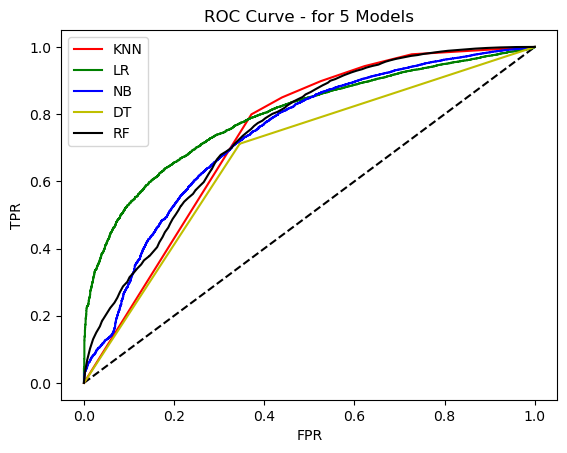

In [244]:
plt.plot([0, 1], [0, 1], "k--")

plt.plot(fprk, tprk, label = "KNN",color = 'r')
plt.plot(fprL, tprL, label = "LR",color = 'g')
plt.plot(fprN, tprN, label = "NB" , color = 'b')
plt.plot(fprD, tprD, label = "DT",color = 'y')
plt.plot(fprR, tprR, label = "RF" , color = 'black')

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - for 5 Models")
plt.legend(loc = 0)
plt.show()

- After checking AUC and ROC curves Logistic Regression has High result so I am finalizing My Model
- Making Logistic regression works better You can use Hyperparameter tuning techinques:

In [245]:
X_train_1.columns

Index(['age_yeo_h', 'NumberOfOpenCreditLinesAndLoans_yeo_h',
       'NumberRealEstateLoansOrLines_yeo_h', 'MonthlyIncome_mode_yeo_h',
       'Gender_Male', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Rented_re', 'Occupation_re', 'Education_re'],
      dtype='object')

In [246]:
## testing with custom data:

values = [23 , 2 , 4 , 4000 , 1 , 0,0,0,1 , 1 , 2 , 2]
values = np.array(values)
values

array([  23,    2,    4, 4000,    1,    0,    0,    0,    1,    1,    2,
          2])

In [247]:
values.shape
values = values.reshape(1,-1)
values.shape

(1, 12)

In [248]:
p = sc.transform(values)
p

array([[ 1.94758829e+00, -9.19317540e-01,  8.25359729e+00,
         3.45324722e+02,  8.13679053e-01, -3.51688312e-01,
        -5.79864930e-01, -4.40908962e-01,  1.46538774e+00,
         1.20260213e+00, -1.90455083e-01, -1.23309252e-01]])

In [249]:
sol = r2.predict(p)
if sol == 1:
    print('It is a good transcation')
else:
    print('It is a Bad Transcation')

It is a good transcation


In [250]:
# In fun 

def fun(values):
    values = np.array(values)
    values = values.reshape(1,-1)
    p = sc.transform(values)
    sol = r2.predict(p)
    if sol == 1:
        print('It is a good transcation')
    else:
        print('It is a Bad Transcation')

In [251]:
fun([23 , 2 , 4 , 4000 , 1 , 0,0,0,1 , 1 , 2 , 2])

It is a good transcation


- save the model

In [252]:
import pickle 

In [253]:
with open('credit_project.pkl' , 'wb') as f:
    pickle.dump(r2 , f)

In [254]:
# Saving standard scalar variable into pickle for loading and scaling down values:

In [255]:
with open('standardscalar.pkl' , 'wb') as f:   
    pickle.dump(sc, f)

In [256]:
standard_scalar = pickle.load(open('standardscalar.pkl', 'rb')) #standard scalar


In [257]:
model = pickle.load(open('credit_project.pkl' , 'rb'))  #model

In [258]:
def fun(values):
    values = np.array(values)
    values = values.reshape(1,-1)
    p = standard_scalar.transform(values)
    print(p)
    sol = model.predict(p)
    if sol == 1:
        print('It is a good transcation')
    else:
        print('It is a Bad Transcation')

In [259]:
fun([23 , 2 , 4 , 4000 , 1 , 0,0,0,1 , 1 , 2 , 2])

[[ 1.94758829e+00 -9.19317540e-01  8.25359729e+00  3.45324722e+02
   8.13679053e-01 -3.51688312e-01 -5.79864930e-01 -4.40908962e-01
   1.46538774e+00  1.20260213e+00 -1.90455083e-01 -1.23309252e-01]]
It is a good transcation
